In [ ]:
#!pip install mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import mne #library untuk pemrosesan sinyal elektroensefalografi (EEG)
from scipy.signal import firwin, lfilter
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


ValueError: This sheet is too large! Your sheet size is: 1580365, 25 Max sheet size is: 1048576, 16384

# GABUNG SEMUA DATA FFT
fft yang masih memiliki semua frekuensi

In [ ]:
T_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb01_03.csv")
T_2 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb01_04.csv")
T_3 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb01_15.csv")
T_4 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb01_16.csv")
T_5 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb01_18.csv")
T_6 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb01_21.csv")
T_7 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb01_26.csv")
T_8 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb02_16.csv")
T_9 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb02_16+.csv")
T_10 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb02_19.csv")
T_11 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb03_01.csv")
T_12 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb03_02.csv")
T_13 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb03_03.csv")
T_14 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb03_04.csv")
T_15 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb03_34.csv")
T_16 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb03_35.csv")
T_17 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb03_36.csv")
T_18 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb04_05.csv")
T_19 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb04_08.csv")
T_20 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb04_28.csv")
T_20_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb04_28_1.csv")
T_21 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb05_06.csv")
T_22 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb05_13.csv")
T_23 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb05_16.csv")
T_24 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb05_17.csv")
T_25 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb05_22.csv")
T_26 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb06_01.csv")
T_26_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb06_01_1.csv")
T_26_2 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb06_01_2.csv")
T_27 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb06_04.csv")
T_27_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb06_04_1.csv")
T_28 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb06_09.csv")
T_29 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb06_10.csv")
T_30 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb06_13.csv")
T_31 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb06_18.csv")
T_32 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb06_24.csv")
T_33 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb07_12.csv")
T_34 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb07_13.csv")
T_35 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb07_19.csv")
T_36 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb08_02.csv")
T_37 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb08_05.csv")
T_38 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb08_11.csv")
T_39 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb08_13.csv")
T_40 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb08_21.csv")
T_41 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb09_06.csv")
T_42 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb09_08.csv")
T_42_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb09_08_1.csv")
T_43 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb09_19.csv")
T_44 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb10_12.csv")
T_45 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb10_20.csv")
T_46 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb10_27.csv")
T_47 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb10_30.csv")
T_48 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb10_31.csv")
T_49 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb10_38.csv")
T_50 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb10_89.csv")
T_51 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb11_82.csv")
T_52 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb11_92.csv")
T_53 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb11_99.csv")
T_54 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_06.csv")
T_54_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_06_1.csv")
T_55 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_08.csv")
T_55_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_08_1.csv")
T_55_2 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_08_2.csv")
T_55_3 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_08_3.csv")
T_56 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_09.csv")
T_56_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_09_1.csv")
T_57 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_10.csv")
T_57_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_10_1.csv")
T_58 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_11.csv")
T_59 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_23.csv")
T_59_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_23_1.csv")
T_59_2 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_23_2.csv")
#T_60 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_27.csv")
#T_61 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_28.csv")
#T_62 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_29.csv")
T_63 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_33.csv")
T_63_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_33_1.csv")
T_64 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_36.csv")
T_65 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_38.csv")
T_65_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_38_1.csv")
T_65_2 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_38_2.csv")
T_65_3 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_38_3.csv")
T_65_4 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_38_4.csv")
T_66 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_42.csv")
T_66_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_42_1.csv")
T_66_2 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_42_2.csv")
T_66_3 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_42_3.csv")
T_66_4 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb12_42_4.csv")
T_67 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb13_19.csv")
T_68 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb13_21.csv")
#T_69 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb13_40.csv")
#T_69_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb13_40_1.csv")
T_70 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb13_55.csv")
T_70_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb13_55_1.csv")
T_71 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb13_58.csv")
T_72 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb13_59.csv")
T_73 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb13_60.csv")
T_74 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb13_62.csv")
T_74_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb13_62_1.csv")
T_74_2 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb13_62_2.csv")
T_75 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb14_03.csv")
T_76 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb14_04.csv")
T_76_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb14_04_1.csv")
T_77 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb14_06.csv")
T_78 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb14_11.csv")
T_79 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb14_17.csv")
T_80 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb14_18.csv")
T_81 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb14_27.csv")
T_82 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_06.csv")
T_83 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_10.csv")
T_84 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_15.csv")
T_85 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_17.csv")
T_86 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_20.csv")
T_87 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_22.csv")
T_88 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_28.csv")
T_89 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_31.csv")
T_90 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_40.csv")
T_90_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_40_1.csv")
T_90_2 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_40_2.csv")
T_91 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_46.csv")
T_92 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_49.csv")
T_93 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_52.csv")
T_94 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_54.csv")
T_94_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_54_1.csv")
T_94_2 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_54_2.csv")
T_94_3 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_54_3.csv")
T_94_4 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_54_4.csv")
T_95 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb15_62.csv")
T_96 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb16_10.csv")
T_97 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb16_11.csv")
T_98 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb16_14.csv")
T_99 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb16_16.csv")
T_100 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb16_17.csv")
T_100_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb16_17_1.csv")
T_100_2 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb16_17_2.csv")
T_100_3 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb16_17_3.csv")
#T_101 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb16_18.csv")
#T_101_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb16_18_1.csv")
T_102 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb17_03.csv")
T_103 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb17_04.csv")
T_104 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb17_63.csv")
T_105 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb18_29.csv")
T_106 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb18_30.csv")
T_107 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb18_31.csv")
T_108 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb18_32.csv")
T_109 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb18_35.csv")
T_110 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb18_36.csv")
T_111 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb19_28.csv")
T_112 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb19_29.csv")
T_113 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb19_30.csv")
T_114 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb20_12.csv")
T_115 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb20_13.csv")
T_115_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb20_13_1.csv")
T_116 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb20_14.csv")
T_117 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb20_15.csv")
T_117_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb20_15_1.csv")
T_118 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb20_16.csv")
T_119 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb20_68.csv")
T_120 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb21_19.csv")
T_121 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb21_20.csv")
T_122 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb21_21.csv")
T_123 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb21_22.csv")
T_124 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb22_20.csv")
T_125 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb22_25.csv")
T_126 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb22_38.csv")
T_127 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb23_06.csv")
T_128 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb23_08.csv")
T_128_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb23_08_1.csv")
T_129 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb23_09.csv")
T_129_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb23_09_1.csv")
T_129_2 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb23_09_2.csv")
T_129_3 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb23_09_3.csv")
T_130 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_01.csv")
T_131 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_03.csv")
T_132 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_04.csv")
T_132_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_04_1.csv")
T_132_2 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_04_2.csv")
T_133 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_06.csv")
T_134 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_07.csv")
T_135 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_09.csv")
T_136 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_11.csv")
T_137 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_13.csv")
T_138 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_14.csv")
T_139 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_15.csv")
T_140 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_17.csv")
T_141 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb24_21.csv")

T_data = pd.concat([T_1, T_2, T_3, T_4, T_5, T_6, T_7, T_8, T_9, T_10,
                    T_11, T_12, T_13, T_14, T_15, T_16, T_17, T_18,
                    T_19, T_20, T_20_1, T_21, T_22, T_23, T_24,
                    T_25, T_26, T_26_1, T_26_2, T_27, T_27_1,
                    T_28, T_29, T_30, T_31, T_32, T_33, T_34,
                    T_35, T_36, T_37, T_38, T_39, T_40,
                    T_41, T_42, T_42_1, T_43, T_44, T_45,
                    T_46, T_47, T_48, T_49, T_50, T_51,
                    T_52, T_53, T_54, T_54_1, T_55, T_55_1,
                    T_55_2, T_55_3, T_56, T_56_1, T_57, T_57_1,
                    T_58, T_59, T_59_1, T_59_2, T_63, T_63_1,
                    T_64, T_65, T_65_1, T_65_2, T_65_3, T_65_4,
                    T_66, T_66_1, T_66_2, T_66_3, T_66_4, T_67,
                    T_68, T_70, T_70_1, T_71, T_72, T_73,
                    T_74, T_74_1, T_74_2, T_75, T_76, T_76_1,
                    T_77, T_78, T_79, T_80, T_81, T_82,
                    T_83, T_84, T_85, T_86, T_87, T_88,
                    T_89, T_90, T_90_1, T_90_2, T_91, T_92,
                    T_93, T_94, T_94_1, T_94_2, T_94_3, T_94_4,
                    T_95, T_96, T_97, T_98, T_99, T_100,
                    T_100_1, T_100_2, T_100_3, T_102, T_103,
                    T_104, T_105, T_106, T_107, T_108, T_109,
                    T_110, T_111, T_112, T_113, T_114, T_115,
                    T_115_1, T_116, T_117, T_117_1, T_118, T_119,
                    T_120, T_121, T_122, T_123, T_124, T_125,
                    T_126, T_127, T_128, T_128_1, T_129, T_129_1,
                    T_129_2, T_129_3, T_130, T_131, T_132,
                    T_132_1, T_132_2, T_133, T_134, T_135,
                    T_136, T_137, T_138, T_139, T_140, T_141], ignore_index=True)

# Simpan data yang digabung
T_data.to_csv("/content/drive/MyDrive/TA/FFT 1-50 HZ (GAK DI CUT).csv", index=False)

# MULAI PRE PROCESSING (0-128 hz)
- import data yang masih memiliki semua frekuensi
- hapus kolom seizure dan time
- labeling data 1-25hz kejang, sisanya tidak kejang
- simpan data dengan nama "FFT 1-50 HZ (GAK DI CUT) (udah di labeling)"
dilihat persentase data label nya (Tidak Kejang : 3366573, Kejang : 761299)
- visualisasikan data yang masih punya semua frekuensi
- random forest
Akurasi pada data latih: 0. 9315043437946375
Akurasi pada data uji: 0.9302655724797868


In [ ]:
df_fft_gakcut = pd.read_csv("/content/drive/MyDrive/TA/FFT 1-50 HZ (GAK DI CUT).csv")

In [ ]:
df_fft_gakcut

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi,Time
0,0.000157,0.000071,0.001070,0.001301,0.000145,0.000176,0.001193,0.001265,0.000252,0.000455,...,0.000145,0.001356,0.001055,0.000362,0.000662,0.000053,0.001400,tidak kejang,0.000000,NaN
1,0.000166,0.000078,0.001064,0.001293,0.000156,0.000182,0.001184,0.001258,0.000262,0.000461,...,0.000150,0.001349,0.001064,0.000355,0.000651,0.000049,0.001391,tidak kejang,0.006250,NaN
2,0.000167,0.000078,0.001065,0.001296,0.000154,0.000183,0.001188,0.001259,0.000262,0.000463,...,0.000150,0.001349,0.001066,0.000354,0.000655,0.000045,0.001392,tidak kejang,0.012500,NaN
3,0.000161,0.000075,0.001062,0.001291,0.000149,0.000179,0.001184,0.001255,0.000256,0.000464,...,0.000151,0.001349,0.001062,0.000352,0.000650,0.000053,0.001391,tidak kejang,0.018750,NaN
4,0.000171,0.000081,0.001066,0.001297,0.000163,0.000184,0.001191,0.001260,0.000265,0.000457,...,0.000148,0.001350,0.001066,0.000358,0.000656,0.000050,0.001392,tidak kejang,0.025000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127867,0.000005,0.000015,0.000031,0.000018,0.000004,0.000399,0.000403,0.000040,0.000008,0.000024,...,0.000020,0.000016,0.000031,0.000013,0.000012,0.000018,0.000030,kejang,127.973404,NaN
4127868,0.000005,0.000015,0.000031,0.000018,0.000004,0.000399,0.000403,0.000040,0.000008,0.000024,...,0.000020,0.000016,0.000031,0.000013,0.000012,0.000018,0.000030,kejang,127.978723,NaN
4127869,0.000005,0.000015,0.000031,0.000018,0.000004,0.000399,0.000403,0.000040,0.000008,0.000024,...,0.000020,0.000016,0.000031,0.000013,0.000012,0.000018,0.000030,kejang,127.984043,NaN
4127870,0.000005,0.000015,0.000031,0.000018,0.000004,0.000399,0.000403,0.000040,0.000008,0.000024,...,0.000020,0.000016,0.000031,0.000013,0.000012,0.000018,0.000030,kejang,127.989362,NaN


In [ ]:
# Menghapus kolom 'seizure' dan 'Time'
df_fft_gakcut.drop(columns=['seizure', 'Time'], inplace=True)

# Menampilkan DataFrame setelah penghapusan
print(df_fft_gakcut)

           FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0        0.000157  0.000071  0.001070  0.001301  0.000145  0.000176  0.001193   
1        0.000166  0.000078  0.001064  0.001293  0.000156  0.000182  0.001184   
2        0.000167  0.000078  0.001065  0.001296  0.000154  0.000183  0.001188   
3        0.000161  0.000075  0.001062  0.001291  0.000149  0.000179  0.001184   
4        0.000171  0.000081  0.001066  0.001297  0.000163  0.000184  0.001191   
...           ...       ...       ...       ...       ...       ...       ...   
4127867  0.000005  0.000015  0.000031  0.000018  0.000004  0.000399  0.000403   
4127868  0.000005  0.000015  0.000031  0.000018  0.000004  0.000399  0.000403   
4127869  0.000005  0.000015  0.000031  0.000018  0.000004  0.000399  0.000403   
4127870  0.000005  0.000015  0.000031  0.000018  0.000004  0.000399  0.000403   
4127871  0.000005  0.000015  0.000031  0.000018  0.000004  0.000399  0.000403   

            P3-O1    FP2-F4

In [ ]:
# Menambahkan kolom labeling berdasarkan frekuensi
df_fft_gakcut['seizure'] = df_fft_gakcut['frekuensi'].apply(lambda x: 'Kejang' if 1 <= x <= 25 else 'Tidak Kejang')

# Menampilkan DataFrame setelah penambahan label
print(df_fft_gakcut)

           FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0        0.000157  0.000071  0.001070  0.001301  0.000145  0.000176  0.001193   
1        0.000166  0.000078  0.001064  0.001293  0.000156  0.000182  0.001184   
2        0.000167  0.000078  0.001065  0.001296  0.000154  0.000183  0.001188   
3        0.000161  0.000075  0.001062  0.001291  0.000149  0.000179  0.001184   
4        0.000171  0.000081  0.001066  0.001297  0.000163  0.000184  0.001191   
...           ...       ...       ...       ...       ...       ...       ...   
4127867  0.000005  0.000015  0.000031  0.000018  0.000004  0.000399  0.000403   
4127868  0.000005  0.000015  0.000031  0.000018  0.000004  0.000399  0.000403   
4127869  0.000005  0.000015  0.000031  0.000018  0.000004  0.000399  0.000403   
4127870  0.000005  0.000015  0.000031  0.000018  0.000004  0.000399  0.000403   
4127871  0.000005  0.000015  0.000031  0.000018  0.000004  0.000399  0.000403   

            P3-O1    FP2-F4

In [ ]:
# Simpan data yang digabung
df_fft_gakcut.to_csv("/content/drive/MyDrive/TA/FFT 1-50 HZ (GAK DI CUT) (udah di labeling).csv", index=False)

In [ ]:
df_fft_gakcut_labeling = pd.read_csv("/content/drive/MyDrive/TA/FFT 1-50 HZ (GAK DI CUT) (udah di labeling).csv")
df_fft_gakcut_labeling

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,frekuensi,seizure
0,0.000157,0.000071,0.001070,0.001301,0.000145,0.000176,0.001193,0.001265,0.000252,0.000455,...,0.001062,0.000145,0.001356,0.001055,0.000362,0.000662,0.000053,0.001400,0.000000,Tidak Kejang
1,0.000166,0.000078,0.001064,0.001293,0.000156,0.000182,0.001184,0.001258,0.000262,0.000461,...,0.001047,0.000150,0.001349,0.001064,0.000355,0.000651,0.000049,0.001391,0.006250,Tidak Kejang
2,0.000167,0.000078,0.001065,0.001296,0.000154,0.000183,0.001188,0.001259,0.000262,0.000463,...,0.001054,0.000150,0.001349,0.001066,0.000354,0.000655,0.000045,0.001392,0.012500,Tidak Kejang
3,0.000161,0.000075,0.001062,0.001291,0.000149,0.000179,0.001184,0.001255,0.000256,0.000464,...,0.001037,0.000151,0.001349,0.001062,0.000352,0.000650,0.000053,0.001391,0.018750,Tidak Kejang
4,0.000171,0.000081,0.001066,0.001297,0.000163,0.000184,0.001191,0.001260,0.000265,0.000457,...,0.001054,0.000148,0.001350,0.001066,0.000358,0.000656,0.000050,0.001392,0.025000,Tidak Kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127867,0.000005,0.000015,0.000031,0.000018,0.000004,0.000399,0.000403,0.000040,0.000008,0.000024,...,0.000072,0.000020,0.000016,0.000031,0.000013,0.000012,0.000018,0.000030,127.973404,Tidak Kejang
4127868,0.000005,0.000015,0.000031,0.000018,0.000004,0.000399,0.000403,0.000040,0.000008,0.000024,...,0.000072,0.000020,0.000016,0.000031,0.000013,0.000012,0.000018,0.000030,127.978723,Tidak Kejang
4127869,0.000005,0.000015,0.000031,0.000018,0.000004,0.000399,0.000403,0.000040,0.000008,0.000024,...,0.000072,0.000020,0.000016,0.000031,0.000013,0.000012,0.000018,0.000030,127.984043,Tidak Kejang
4127870,0.000005,0.000015,0.000031,0.000018,0.000004,0.000399,0.000403,0.000040,0.000008,0.000024,...,0.000072,0.000020,0.000016,0.000031,0.000013,0.000012,0.000018,0.000030,127.989362,Tidak Kejang


Jumlah data seizure dan tidak seizure:
seizure
Tidak Kejang    3366573
Kejang           761299
Name: count, dtype: int64


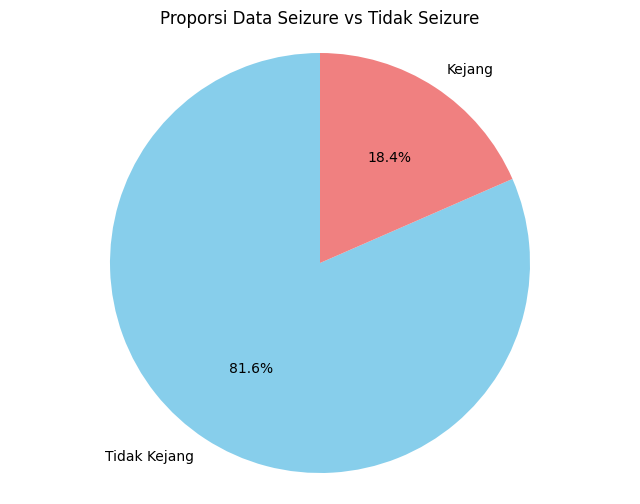

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah masing-masing label (seizure dan tidak seizure)
seizure_counts = df_fft_gakcut_labeling['seizure'].value_counts()

# Menampilkan jumlah data seizure dan tidak seizure
print("Jumlah data seizure dan tidak seizure:")
print(seizure_counts)

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Data Seizure vs Tidak Seizure')
plt.axis('equal')  # Menjaga proporsi lingkaran tetap
plt.show()

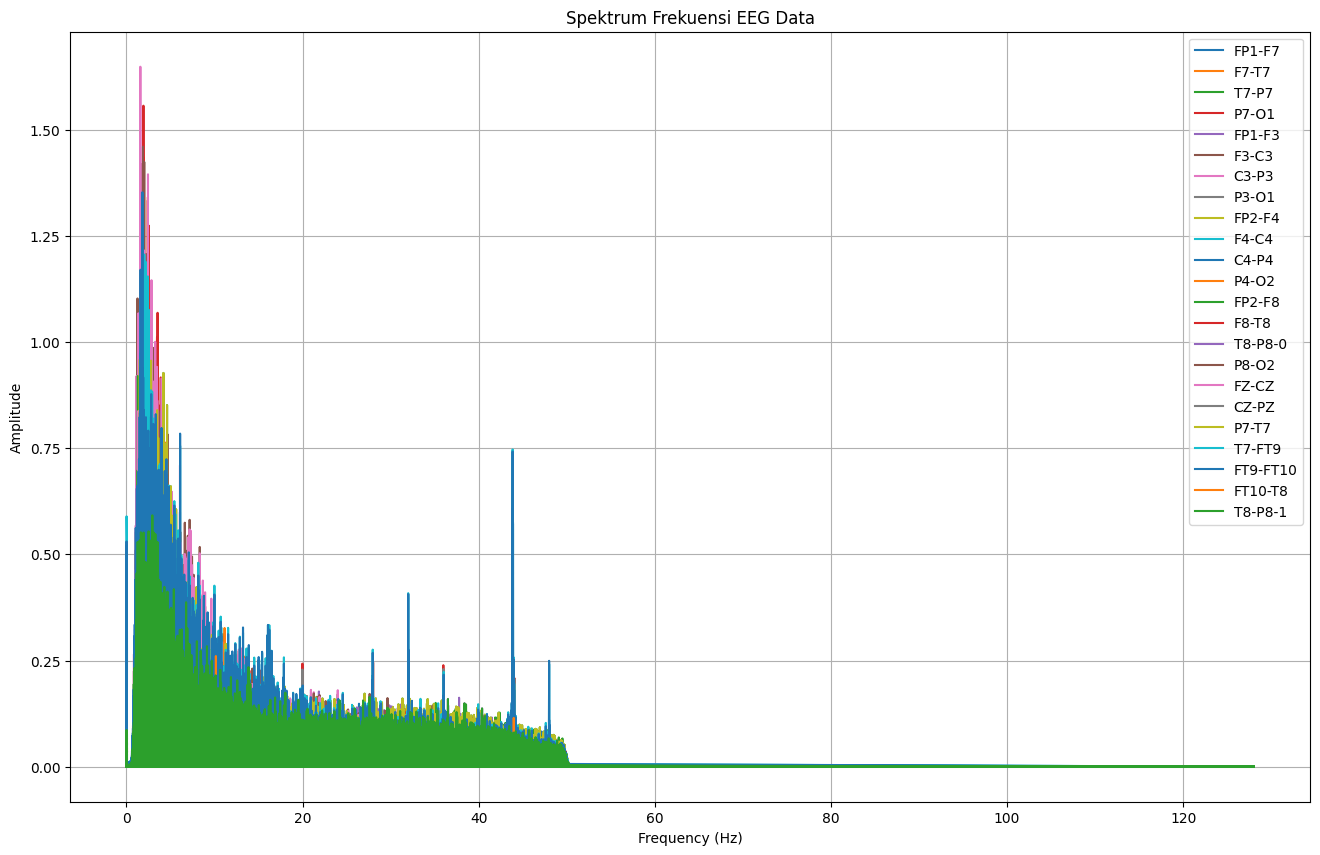

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_fft_gakcut_labeling = pd.read_csv("/content/drive/MyDrive/TA/FFT 1-50 HZ (GAK DI CUT) (udah di labeling).csv")


# Misalkan data memiliki kolom 'Frequency' sebagai sumbu x
frequency = df_fft_gakcut_labeling['frekuensi']

# Daftar channel yang ingin divisualisasikan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

plt.figure(figsize=(16, 10))

for channel in channels:
    if channel in df_fft_gakcut_labeling.columns:
        plt.plot(frequency, df_fft_gakcut_labeling[channel].values, label=channel)

plt.title('Spektrum Frekuensi EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Akurasi pada data latih: 0.9315043437946375
Akurasi pada data uji: 0.9302655724797868
Laporan Klasifikasi (Data Uji):
               precision    recall  f1-score   support

      Kejang       0.80      0.82      0.81    152260
Tidak Kejang       0.96      0.95      0.96    673315

    accuracy                           0.93    825575
   macro avg       0.88      0.89      0.89    825575
weighted avg       0.93      0.93      0.93    825575



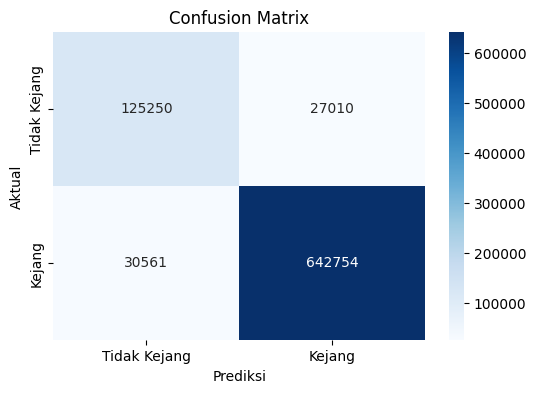

In [ ]:
# ini random forest
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 11: Siapkan data untuk klasifikasi
X = df_fft_gakcut_labeling.drop(['frekuensi', 'seizure'], axis=1)
y = df_fft_gakcut_labeling['seizure']

# Step 12: Bagi data menjadi latih dan uji secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Step 13: Latih model Random Forest dengan max_features='sqrt'
model = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data latih
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prediksi pada data uji
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Step 14: Evaluasi model -> Cetak akurasi dan laporan
print("Akurasi pada data latih:", train_accuracy)  # Akurasi pada data latih
print("Akurasi pada data uji:", test_accuracy)  # Akurasi pada data uji
print("Laporan Klasifikasi (Data Uji):\n", classification_report(y_test, y_pred))

# Step 15: Matriks Evaluasi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Kejang', 'Kejang'], yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# FFT DIPOTONG (1-50 HZ)
- import data FFT yang sudah digabung (semua frekuensi) dan labeling nya sudah benar
- hapus data  dengan frekuensi diluar 1-50 hz
- simpan data  yang sudah di cut dengan nama "FFT 1-50 HZ (DI CUT) (udah di labeling).csv"
- visualisasikan data yang sudah di cut
- hitung jumlah proporsi data
Tidak Kejang    792693
Kejang          761128
- random forest
Akurasi pada data latih: 0.8355102264097515
Akurasi pada data uji: 0.831342010844207


In [ ]:
df_fft_gakcut_labeling = pd.read_csv("/content/drive/MyDrive/TA/FFT 1-50 HZ (GAK DI CUT) (udah di labeling).csv")
df_fft_gakcut_labeling

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,frekuensi,seizure
0,0.000157,0.000071,0.001070,0.001301,0.000145,0.000176,0.001193,0.001265,0.000252,0.000455,...,0.001062,0.000145,0.001356,0.001055,0.000362,0.000662,0.000053,0.001400,0.000000,Tidak Kejang
1,0.000166,0.000078,0.001064,0.001293,0.000156,0.000182,0.001184,0.001258,0.000262,0.000461,...,0.001047,0.000150,0.001349,0.001064,0.000355,0.000651,0.000049,0.001391,0.006250,Tidak Kejang
2,0.000167,0.000078,0.001065,0.001296,0.000154,0.000183,0.001188,0.001259,0.000262,0.000463,...,0.001054,0.000150,0.001349,0.001066,0.000354,0.000655,0.000045,0.001392,0.012500,Tidak Kejang
3,0.000161,0.000075,0.001062,0.001291,0.000149,0.000179,0.001184,0.001255,0.000256,0.000464,...,0.001037,0.000151,0.001349,0.001062,0.000352,0.000650,0.000053,0.001391,0.018750,Tidak Kejang
4,0.000171,0.000081,0.001066,0.001297,0.000163,0.000184,0.001191,0.001260,0.000265,0.000457,...,0.001054,0.000148,0.001350,0.001066,0.000358,0.000656,0.000050,0.001392,0.025000,Tidak Kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127867,0.000005,0.000015,0.000031,0.000018,0.000004,0.000399,0.000403,0.000040,0.000008,0.000024,...,0.000072,0.000020,0.000016,0.000031,0.000013,0.000012,0.000018,0.000030,127.973404,Tidak Kejang
4127868,0.000005,0.000015,0.000031,0.000018,0.000004,0.000399,0.000403,0.000040,0.000008,0.000024,...,0.000072,0.000020,0.000016,0.000031,0.000013,0.000012,0.000018,0.000030,127.978723,Tidak Kejang
4127869,0.000005,0.000015,0.000031,0.000018,0.000004,0.000399,0.000403,0.000040,0.000008,0.000024,...,0.000072,0.000020,0.000016,0.000031,0.000013,0.000012,0.000018,0.000030,127.984043,Tidak Kejang
4127870,0.000005,0.000015,0.000031,0.000018,0.000004,0.000399,0.000403,0.000040,0.000008,0.000024,...,0.000072,0.000020,0.000016,0.000031,0.000013,0.000012,0.000018,0.000030,127.989362,Tidak Kejang


In [ ]:
# Menghapus data dengan frekuensi 0-1 Hz dan 50-128 Hz
df_fft_cut_labeling = df_fft_gakcut_labeling[(df_fft_gakcut_labeling['frekuensi'] > 1) & (df_fft_gakcut_labeling['frekuensi'] < 50)]

# Menampilkan DataFrame setelah penyesuaian
print(df_fft_cut_labeling)

           FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
161      0.042544  0.033055  0.014925  0.036853  0.055084  0.020836  0.043148   
162      0.016377  0.033080  0.009235  0.012786  0.020246  0.027485  0.032994   
163      0.046294  0.017675  0.008463  0.012281  0.012340  0.002031  0.012588   
164      0.037570  0.027636  0.040771  0.030980  0.025060  0.023036  0.047046   
165      0.017839  0.044044  0.024074  0.001346  0.014222  0.023165  0.037828   
...           ...       ...       ...       ...       ...       ...       ...   
4113203  0.001327  0.001466  0.000947  0.000686  0.000650  0.011458  0.009218   
4113204  0.003171  0.003590  0.005900  0.006734  0.003418  0.013801  0.012074   
4113205  0.001034  0.001640  0.002307  0.000979  0.002250  0.003955  0.006430   
4113206  0.001234  0.002918  0.001386  0.003595  0.002169  0.022361  0.021101   
4113207  0.002585  0.001384  0.001671  0.003748  0.001931  0.005424  0.004779   

            P3-O1    FP2-F4

In [ ]:
# Simpan data yang digabung
df_fft_cut_labeling.to_csv("/content/drive/MyDrive/TA/FFT 1-50 HZ (DI CUT) (udah di labeling).csv", index=False)

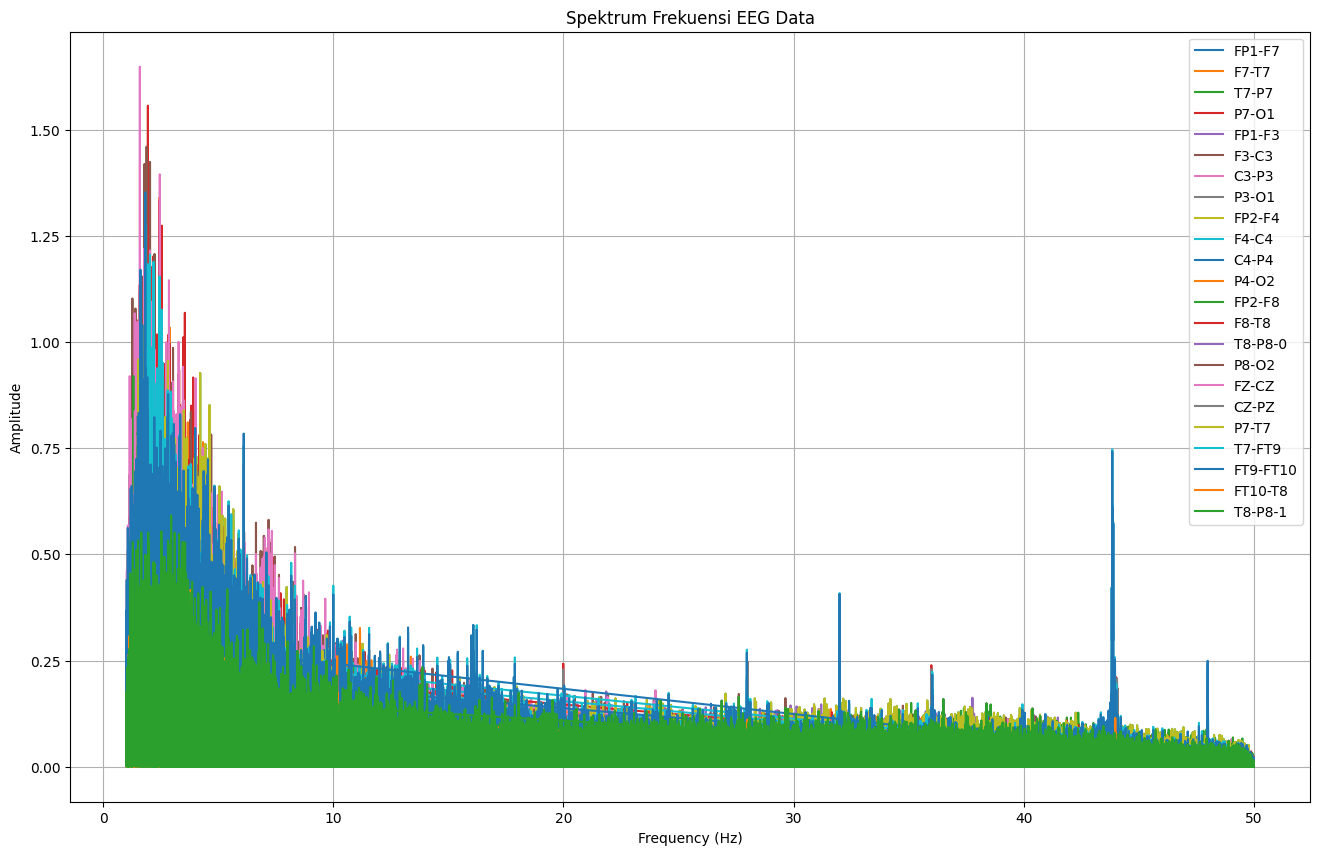

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_fft_cut_labeling = pd.read_csv("/content/drive/MyDrive/TA/FFT 1-50 HZ (DI CUT) (udah di labeling).csv")

# Misalkan data memiliki kolom 'Frequency' sebagai sumbu x
frequency = df_fft_cut_labeling['frekuensi']

# Daftar channel yang ingin divisualisasikan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

plt.figure(figsize=(16, 10))

for channel in channels:
    if channel in df_fft_cut_labeling.columns:
        plt.plot(frequency, df_fft_cut_labeling[channel].values, label=channel)

plt.title('Spektrum Frekuensi EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Jumlah data seizure dan tidak seizure:
seizure
Tidak Kejang    792693
Kejang          761128
Name: count, dtype: int64


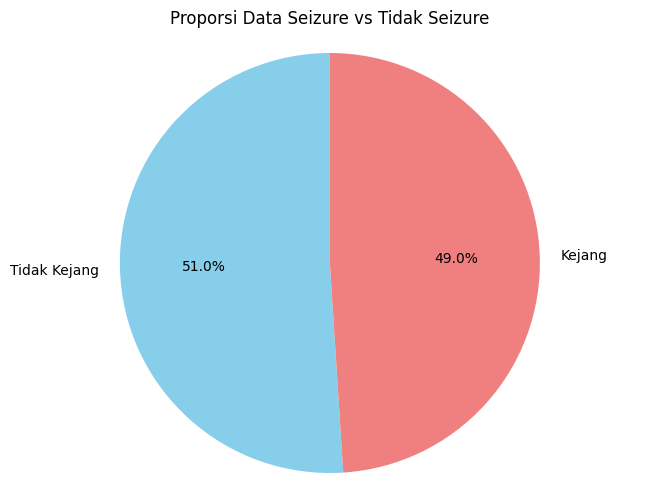

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah masing-masing label (seizure dan tidak seizure)
seizure_counts = df_fft_cut_labeling['seizure'].value_counts()

# Menampilkan jumlah data seizure dan tidak seizure
print("Jumlah data seizure dan tidak seizure:")
print(seizure_counts)

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Data Seizure vs Tidak Seizure')
plt.axis('equal')  # Menjaga proporsi lingkaran tetap
plt.show()

Akurasi pada data latih: 0.8355102264097515
Akurasi pada data uji: 0.831342010844207
Laporan Klasifikasi (Data Uji):
               precision    recall  f1-score   support

      Kejang       0.83      0.83      0.83    152226
Tidak Kejang       0.84      0.83      0.83    158539

    accuracy                           0.83    310765
   macro avg       0.83      0.83      0.83    310765
weighted avg       0.83      0.83      0.83    310765



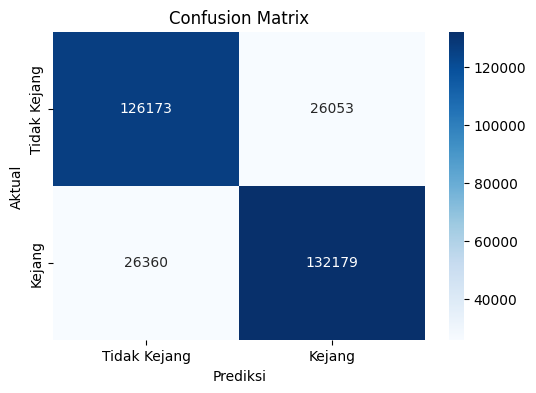

In [ ]:
# ini random forest
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 11: Siapkan data untuk klasifikasi
X = df_fft_cut_labeling.drop(['frekuensi', 'seizure'], axis=1)
y = df_fft_cut_labeling['seizure']

# Step 12: Bagi data menjadi latih dan uji secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Step 13: Latih model Random Forest dengan max_features='sqrt'
model = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data latih
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prediksi pada data uji
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Step 14: Evaluasi model -> Cetak akurasi dan laporan
print("Akurasi pada data latih:", train_accuracy)  # Akurasi pada data latih
print("Akurasi pada data uji:", test_accuracy)  # Akurasi pada data uji
print("Laporan Klasifikasi (Data Uji):\n", classification_report(y_test, y_pred))

# Step 15: Matriks Evaluasi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Kejang', 'Kejang'], yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# liat satu satu channel

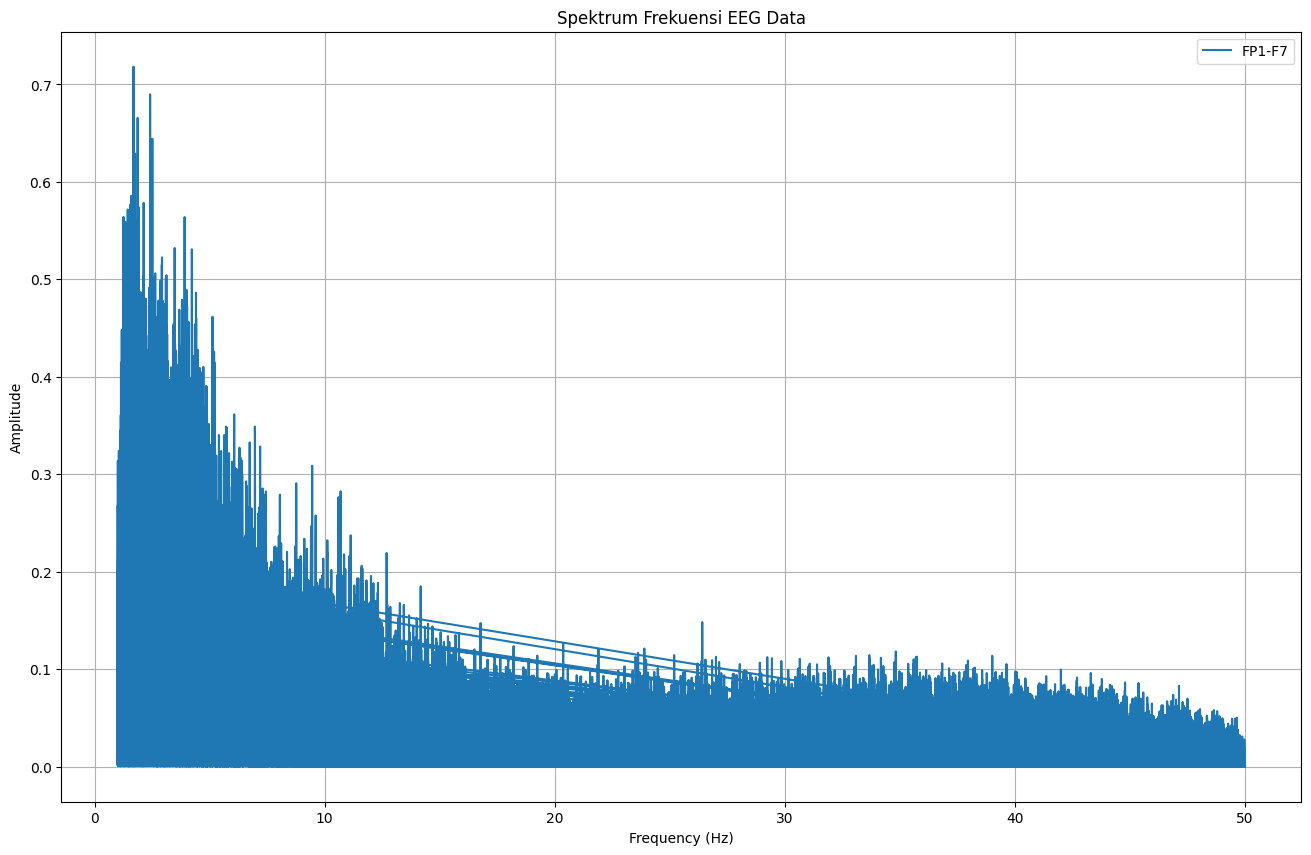

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_fft_cut_labeling = pd.read_csv("/content/drive/MyDrive/TA/FFT 1-50 HZ (DI CUT) (udah di labeling).csv")

# Misalkan data memiliki kolom 'Frequency' sebagai sumbu x
frequency = df_fft_cut_labeling['frekuensi']

# Daftar channel yang ingin divisualisasikan
channels = ['FP1-F7']

plt.figure(figsize=(16, 10))

for channel in channels:
    if channel in df_fft_cut_labeling.columns:
        plt.plot(frequency, df_fft_cut_labeling[channel].values, label=channel)

plt.title('Spektrum Frekuensi EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


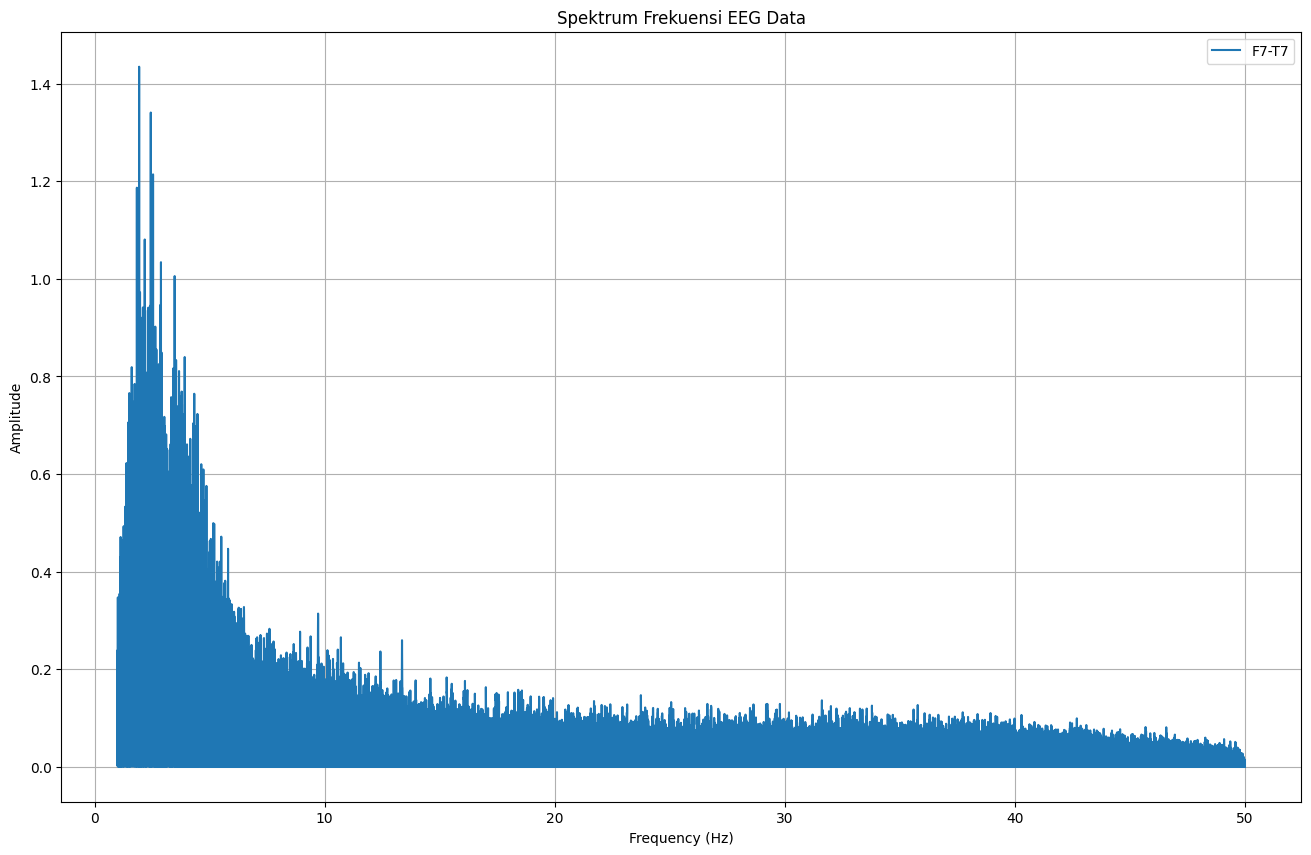

In [ ]:
# Misalkan data memiliki kolom 'Frequency' sebagai sumbu x
frequency = df_fft_cut_labeling['frekuensi']

# Daftar channel yang ingin divisualisasikan
channels = ['F7-T7']

plt.figure(figsize=(16, 10))

for channel in channels:
    if channel in df_fft_cut_labeling.columns:
        plt.plot(frequency, df_fft_cut_labeling[channel].values, label=channel)

plt.title('Spektrum Frekuensi EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

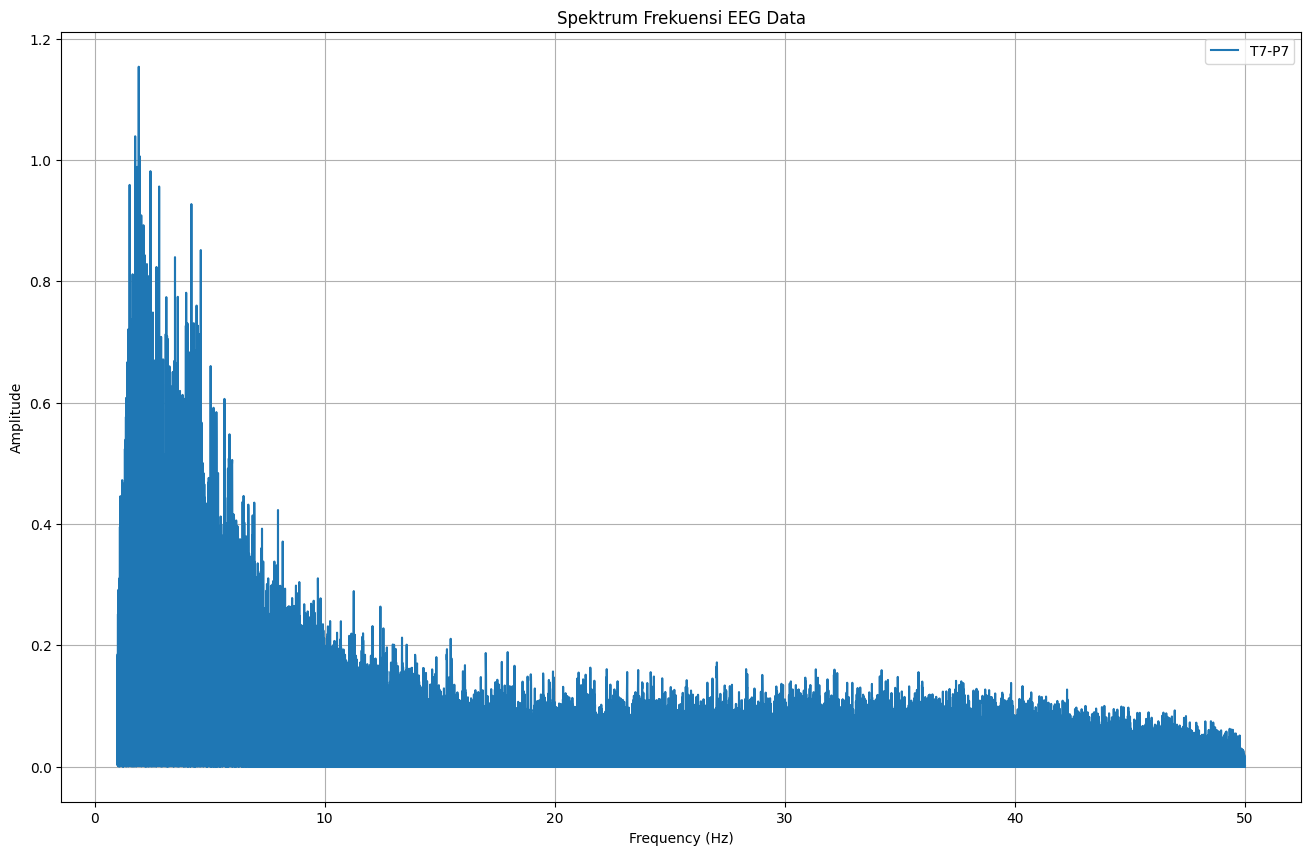

In [ ]:
# Misalkan data memiliki kolom 'Frequency' sebagai sumbu x
frequency = df_fft_cut_labeling['frekuensi']

# Daftar channel yang ingin divisualisasikan
channels = ['T7-P7']

plt.figure(figsize=(16, 10))

for channel in channels:
    if channel in df_fft_cut_labeling.columns:
        plt.plot(frequency, df_fft_cut_labeling[channel].values, label=channel)

plt.title('Spektrum Frekuensi EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

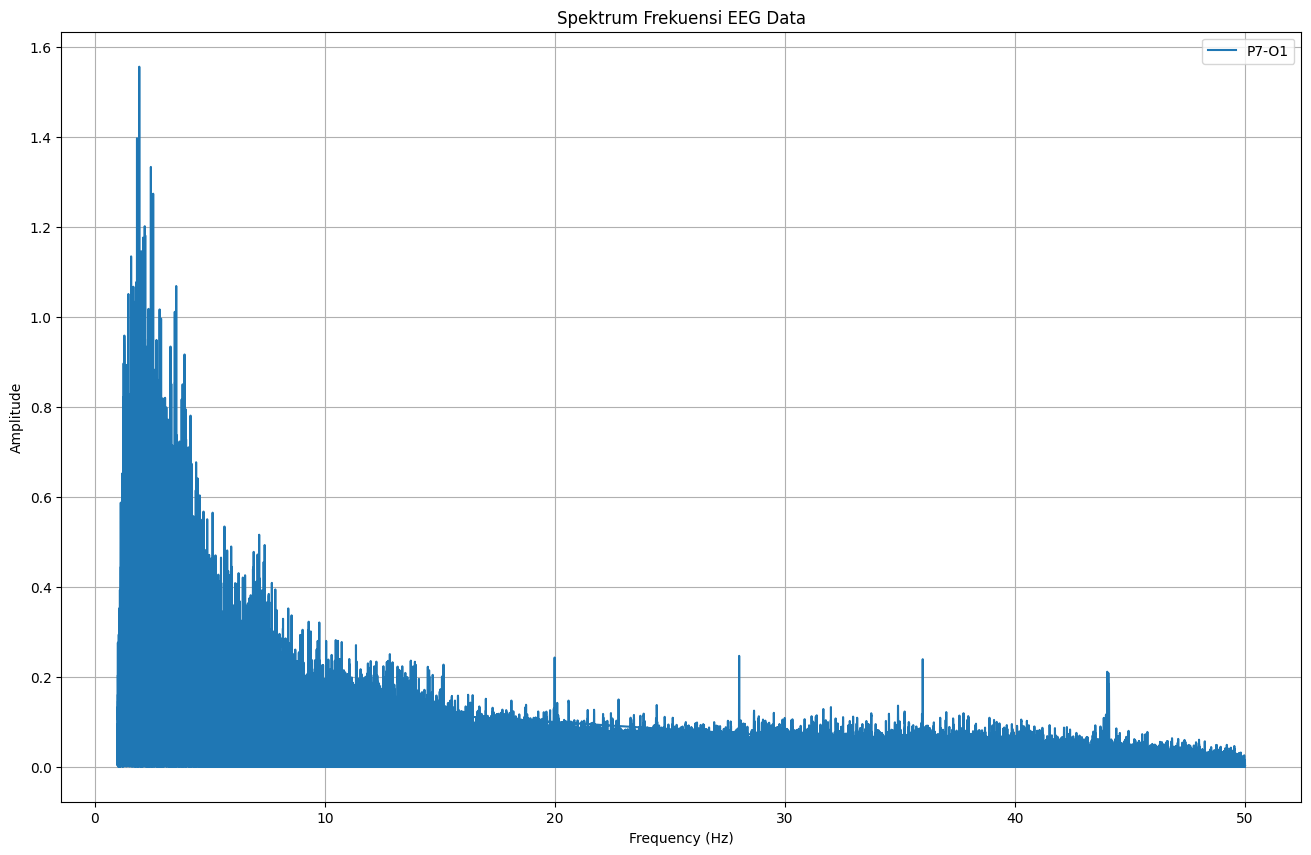

In [ ]:
# Misalkan data memiliki kolom 'Frequency' sebagai sumbu x
frequency = df_fft_cut_labeling['frekuensi']

# Daftar channel yang ingin divisualisasikan
channels = ['P7-O1']

plt.figure(figsize=(16, 10))

for channel in channels:
    if channel in df_fft_cut_labeling.columns:
        plt.plot(frequency, df_fft_cut_labeling[channel].values, label=channel)

plt.title('Spektrum Frekuensi EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

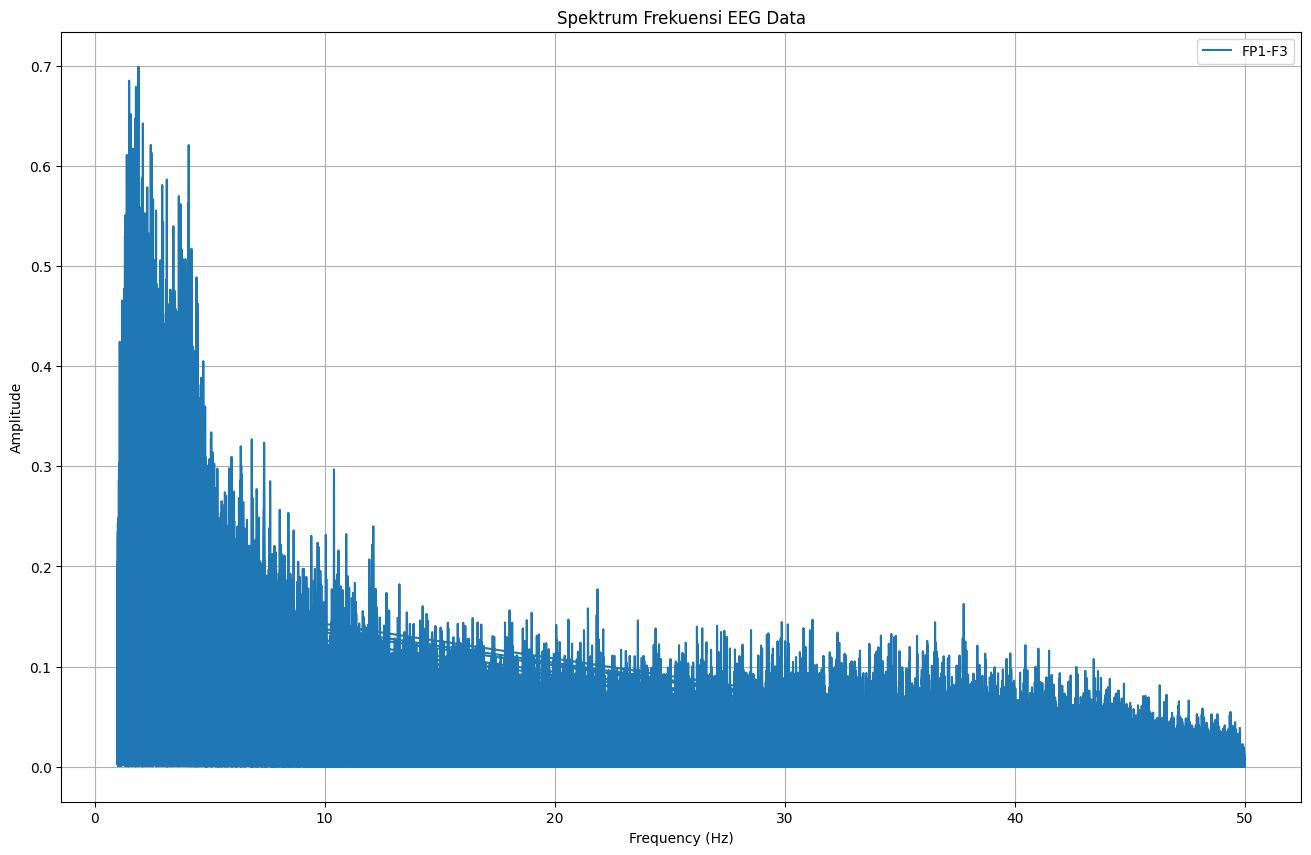

In [ ]:
# Misalkan data memiliki kolom 'Frequency' sebagai sumbu x
frequency = df_fft_cut_labeling['frekuensi']

# Daftar channel yang ingin divisualisasikan
channels = ['FP1-F3']

plt.figure(figsize=(16, 10))

for channel in channels:
    if channel in df_fft_cut_labeling.columns:
        plt.plot(frequency, df_fft_cut_labeling[channel].values, label=channel)

plt.title('Spektrum Frekuensi EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

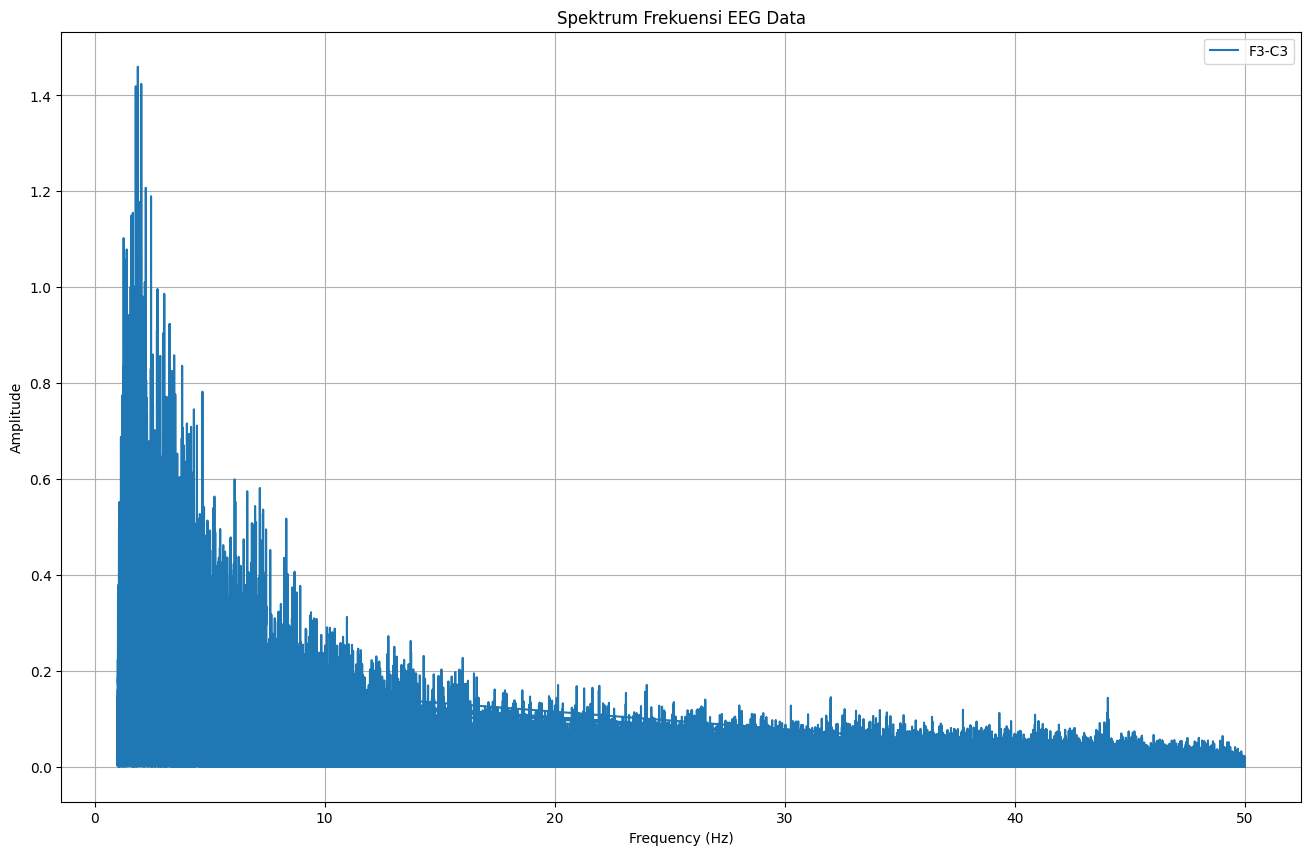

In [ ]:
# Misalkan data memiliki kolom 'Frequency' sebagai sumbu x
frequency = df_fft_cut_labeling['frekuensi']

# Daftar channel yang ingin divisualisasikan
channels = ['F3-C3']

plt.figure(figsize=(16, 10))

for channel in channels:
    if channel in df_fft_cut_labeling.columns:
        plt.plot(frequency, df_fft_cut_labeling[channel].values, label=channel)

plt.title('Spektrum Frekuensi EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# FILTERING -> GABUNG

In [ ]:
T_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb01_03.csv")
T_2 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb01_04.csv")
T_3 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb01_15.csv")
T_4 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb01_16.csv")
T_5 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb01_18.csv")
T_6 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb01_21.csv")
T_7 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb01_26.csv")
T_8 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb02_16.csv")
T_9 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb02_16+.csv")
T_10 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb02_19.csv")
T_11 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb03_01.csv")
T_12 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb03_02.csv")
T_13 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb03_03.csv")
T_14 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb03_04.csv")
T_15 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb03_34.csv")
T_16 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb03_35.csv")
T_17 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb03_36.csv")
T_18 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb04_05.csv")
T_19 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb04_08.csv")
T_20 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb04_28.csv")
T_20_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb04_28_1.csv")
T_21 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb05_06.csv")
T_22 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb05_13.csv")
T_23 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb05_16.csv")
T_24 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb05_17.csv")
T_25 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb05_22.csv")
T_26 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb06_01.csv")
T_26_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb06_01_1.csv")
T_26_2 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb06_01_2.csv")
T_27 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb06_04.csv")
T_27_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb06_04_1.csv")
T_28 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb06_09.csv")
T_29 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb06_10.csv")
T_30 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb06_13.csv")
T_31 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb06_18.csv")
T_32 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb06_24.csv")
T_33 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb07_12.csv")
T_34 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb07_13.csv")
T_35 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb07_19.csv")
T_36 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb08_02.csv")
T_37 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb08_05.csv")
T_38 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb08_11.csv")
T_39 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb08_13.csv")
T_40 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb08_21.csv")
T_41 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb09_06.csv")
T_42 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb09_08.csv")
T_42_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb09_08_1.csv")
T_43 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb09_19.csv")
T_44 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb10_12.csv")
T_45 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb10_20.csv")
T_46 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb10_27.csv")
T_47 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb10_30.csv")
T_48 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb10_31.csv")
T_49 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb10_38.csv")
T_50 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb10_89.csv")
T_51 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb11_82.csv")
T_52 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb11_92.csv")
T_53 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb11_99.csv")
T_54 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_06.csv")
T_54_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_06_1.csv")
T_55 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_08.csv")
T_55_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_08_1.csv")
T_55_2 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_08_2.csv")
T_55_3 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_08_3.csv")
T_56 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_09.csv")
T_56_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_09_1.csv")
T_57 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_10.csv")
T_57_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_10_1.csv")
T_58 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_11.csv")
T_59 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_23.csv")
T_59_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_23_1.csv")
T_59_2 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_23_2.csv")
#T_61 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_28.csv")
#T_62 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_29.csv")
T_63 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_33.csv")
T_63_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_33_1.csv")
T_64 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_36.csv")
T_65 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_38.csv")
T_65_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_38_1.csv")
T_65_2 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_38_2.csv")
T_65_3 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_38_3.csv")
T_65_4 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_38_4.csv")
T_66 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_42.csv")
T_66_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_42_1.csv")
T_66_2 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_42_2.csv")
T_66_3 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_42_3.csv")
T_66_4 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb12_42_4.csv")
T_67 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb13_19.csv")
T_68 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb13_21.csv")
#T_69 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb13_40.csv")
#T_69_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb13_40_1.csv")
T_70 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb13_55.csv")
T_70_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb13_55_1.csv")
T_71 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb13_58.csv")
T_72 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb13_59.csv")
T_73 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb13_60.csv")
T_74 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb13_62.csv")
T_74_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb13_62_1.csv")
T_74_2 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb13_62_2.csv")
T_75 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb14_03.csv")
T_76 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb14_04.csv")
T_76_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb14_04_1.csv")
T_77 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb14_06.csv")
T_78 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb14_11.csv")
T_79 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb14_17.csv")
T_80 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb14_18.csv")
T_81 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb14_27.csv")
T_82 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_06.csv")
T_83 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_10.csv")
T_84 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_15.csv")
T_85 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_17.csv")
T_86 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_20.csv")
T_87 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_22.csv")
T_88 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_28.csv")
T_89 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_31.csv")
T_90 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_40.csv")
T_90_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_40_1.csv")
T_90_2 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_40_2.csv")
T_91 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_46.csv")
T_92 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_49.csv")
T_93 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_52.csv")
T_94 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_54.csv")
T_94_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_54_1.csv")
T_94_2 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_54_2.csv")
T_94_3 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_54_3.csv")
T_94_4 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_54_4.csv")
T_95 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb15_62.csv")
T_96 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb16_10.csv")
T_97 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb16_11.csv")
T_98 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb16_14.csv")
T_99 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb16_16.csv")
T_100 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb16_17.csv")
T_100_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb16_17_1.csv")
T_100_2 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb16_17_2.csv")
T_100_3 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb16_17_3.csv")
#T_101 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb16_18.csv")
#T_101_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb16_18_1.csv")
T_102 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb17_03.csv")
T_103 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb17_04.csv")
T_104 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb17_63.csv")
T_105 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb18_29.csv")
T_106 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb18_30.csv")
T_107 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb18_31.csv")
T_108 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb18_32.csv")
T_109 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb18_35.csv")
T_110 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb18_36.csv")
T_111 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb19_28.csv")
T_112 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb19_29.csv")
T_113 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb19_30.csv")
T_114 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb20_12.csv")
T_115 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb20_13.csv")
T_115_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb20_13_1.csv")
T_116 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb20_14.csv")
T_117 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb20_15.csv")
T_117_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb20_15_1.csv")
T_118 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb20_16.csv")
T_119 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb20_68.csv")
T_120 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb21_19.csv")
T_121 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb21_20.csv")
T_122 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb21_21.csv")
T_123 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb21_22.csv")
T_124 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb22_20.csv")
T_125 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb22_25.csv")
T_126 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb22_38.csv")
T_127 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb23_06.csv")
T_128 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb23_08.csv")
T_128_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb23_08_1.csv")
T_129 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb23_09.csv")
T_129_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb23_09_1.csv")
T_129_2 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb23_09_2.csv")
T_129_3 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb23_09_3.csv")
T_130 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_01.csv")
T_131 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_03.csv")
T_132 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_04.csv")
T_132_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_04_1.csv")
T_132_2 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_04_2.csv")
T_133 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_06.csv")
T_134 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_07.csv")
T_135 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_09.csv")
T_136 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_11.csv")
T_137 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_13.csv")
T_138 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_14.csv")
T_139 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_15.csv")
T_140 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_17.csv")
T_141 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb24_21.csv")




# Menggabungkan semua dataframe dari TA_1 hingga TA_20 menjadi TA_data
T_data = pd.concat([T_1, T_2, T_3, T_4, T_5, T_6, T_7, T_8, T_9, T_10,
                    T_11, T_12, T_13, T_14, T_15, T_16, T_17, T_18,
                    T_19, T_20, T_20_1, T_21, T_22, T_23, T_24,
                    T_25, T_26, T_26_1, T_26_2, T_27, T_27_1,
                    T_28, T_29, T_30, T_31, T_32, T_33, T_34,
                    T_35, T_36, T_37, T_38, T_39, T_40,
                    T_41, T_42, T_42_1, T_43, T_44, T_45,
                    T_46, T_47, T_48, T_49, T_50, T_51,
                    T_52, T_53, T_54, T_54_1, T_55, T_55_1,
                    T_55_2, T_55_3, T_56, T_56_1, T_57, T_57_1,
                    T_58, T_59, T_59_1, T_59_2, T_63, T_63_1,
                    T_64, T_65, T_65_1, T_65_2, T_65_3, T_65_4,
                    T_66, T_66_1, T_66_2, T_66_3, T_66_4, T_67,
                    T_68, T_70, T_70_1,T_71, T_72, T_73,
                    T_74, T_74_1, T_74_2, T_75, T_76, T_76_1,
                    T_77, T_78, T_79, T_80, T_81, T_82,
                    T_83, T_84, T_85, T_86, T_87, T_88,
                    T_89, T_90, T_90_1, T_90_2, T_91, T_92,
                    T_93, T_94, T_94_1, T_94_2, T_94_3, T_94_4,
                    T_95, T_96, T_97, T_98, T_99, T_100,
                    T_100_1, T_100_2, T_100_3, T_102, T_103,
                    T_104, T_105, T_106, T_107, T_108, T_109,
                    T_110, T_111, T_112, T_113, T_114, T_115,
                    T_115_1, T_116, T_117, T_117_1, T_118, T_119,
                    T_120,T_121, T_122, T_123, T_124, T_125,
                    T_126, T_127, T_128, T_128_1, T_129, T_129_1,
                    T_129_2, T_129_3, T_130, T_131, T_132,
                    T_132_1, T_132_2, T_133, T_134, T_135,
                    T_136, T_137, T_138, T_139, T_140, T_141], ignore_index=True)



# Menampilkan 5 baris pertama dari TA_data
print(T_data)

# Simpan data yang digabung
T_data.to_csv("/content/drive/MyDrive/TA/FILTERING 1-50 HZ.csv", index=False)


               FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
0       -8.099730e-12 -1.376954e-10  3.320889e-10  1.012466e-09  1.223059e-09   
1       -3.844219e-10 -7.357662e-10  1.003591e-09  3.423229e-09  3.763322e-09   
2       -1.441329e-09 -1.951858e-09  1.196890e-09  5.191242e-09  4.794628e-09   
3       -2.741424e-09 -3.628649e-09  3.375399e-10  4.925612e-09  2.539114e-09   
4       -3.869614e-09 -5.311253e-09 -1.059834e-09  4.112757e-09 -1.770204e-09   
...               ...           ...           ...           ...           ...   
8255739 -2.308934e-06 -5.400800e-06 -6.765249e-06  9.144535e-05  5.034393e-05   
8255740 -2.658881e-05  1.933730e-06 -6.549417e-05  1.672788e-04  3.269776e-05   
8255741 -3.842966e-05  1.810392e-06 -5.024428e-05  1.556755e-04  6.822327e-06   
8255742 -3.078475e-05 -5.051055e-06  5.410494e-06  9.148562e-05 -1.426821e-05   
8255743 -5.624120e-06 -1.995161e-05  4.914562e-05  4.523800e-05 -1.472047e-05   

                F3-C3      

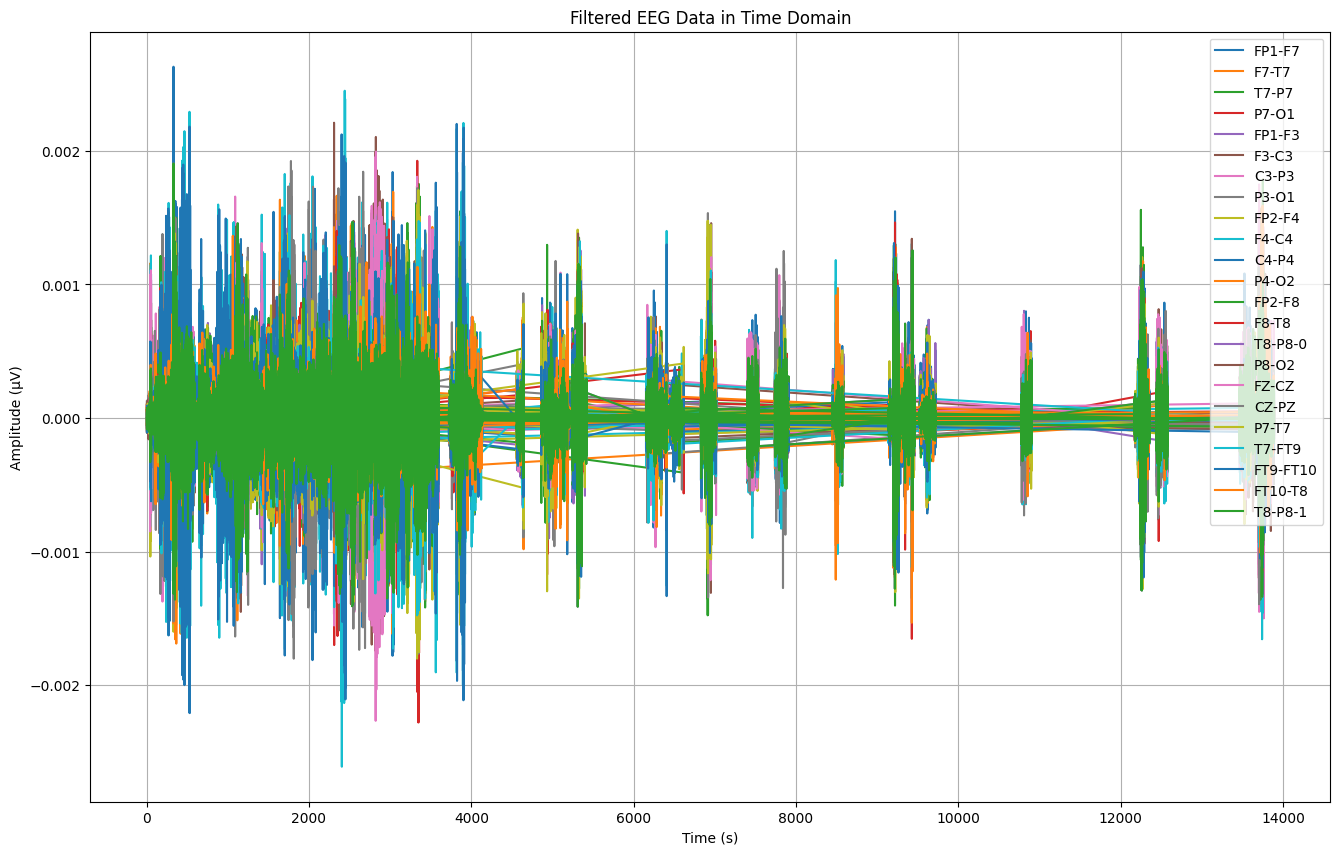

In [ ]:
# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

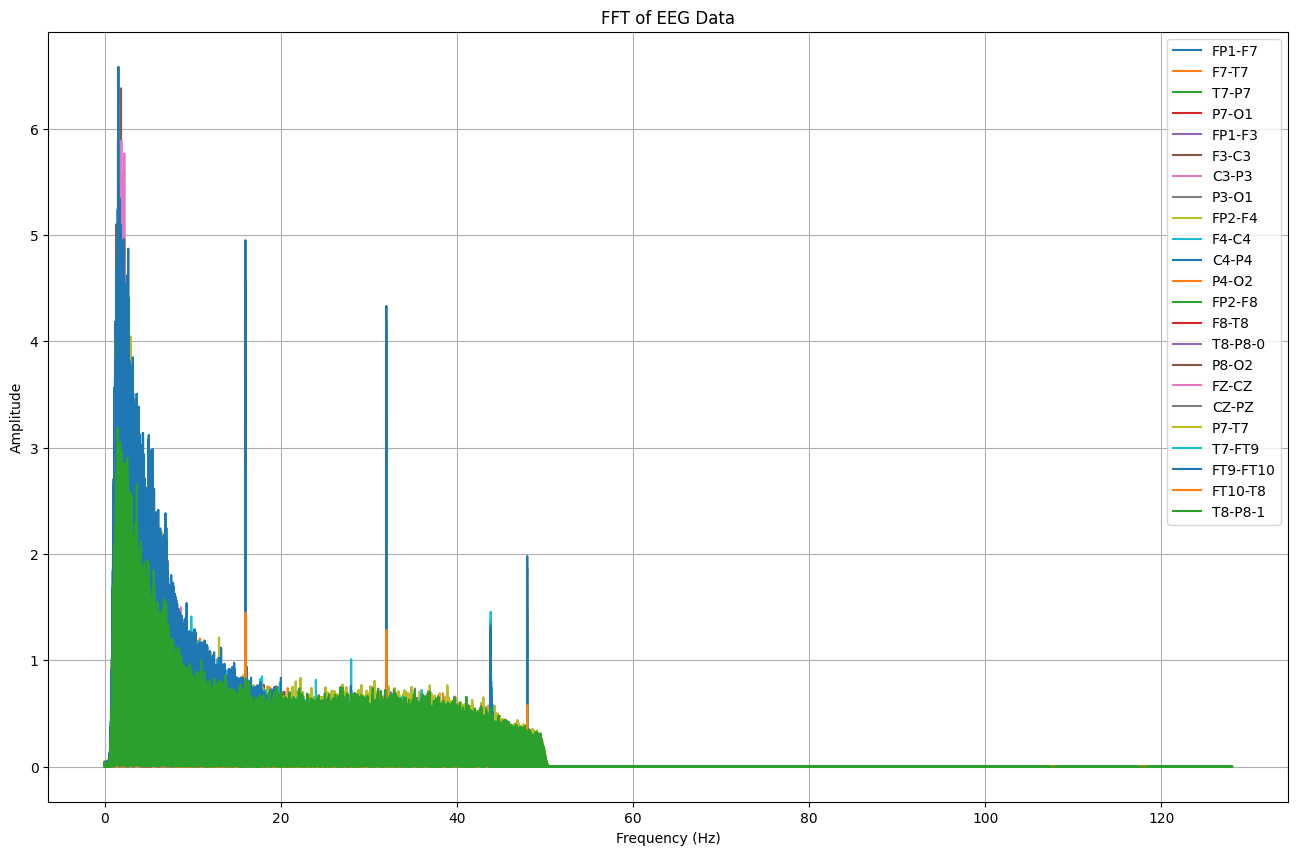

In [ ]:
TA1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING 1-50 HZ.csv")

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
sampling_rate = 256


# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA1.columns:
        signal = TA1[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_1 = pd.DataFrame(fft_features).T
TA_1.columns = channels
TA_1['seizure'] = TA1['seizure']
TA_1['frekuensi'] = fft_freqs  # Masukkan frekuensi sebagai kolom pertama


# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_1.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA1[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



In [ ]:
# Menghapus kolom 'seizure' dan 'Time'
TA_1.drop(columns=['seizure'], inplace=True)

# Menampilkan DataFrame setelah penghapusan
print(TA_1)

           FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0        0.014683  0.014983  0.014981  0.014705  0.012789  0.001777  0.004404   
1        0.020178  0.015334  0.008861  0.007056  0.011900  0.004289  0.013259   
2        0.009895  0.008395  0.002115  0.003198  0.016513  0.007895  0.013164   
3        0.013997  0.003078  0.016560  0.008160  0.015449  0.004605  0.018855   
4        0.019740  0.003326  0.013111  0.004015  0.014774  0.016888  0.014012   
...           ...       ...       ...       ...       ...       ...       ...   
4127867  0.000112  0.000247  0.000503  0.000467  0.000603  0.000571  0.000347   
4127868  0.000235  0.000169  0.000377  0.000246  0.000286  0.000408  0.000444   
4127869  0.000143  0.000231  0.000328  0.000338  0.000202  0.000711  0.000647   
4127870  0.000351  0.000559  0.000423  0.000348  0.000410  0.000313  0.000263   
4127871  0.000311  0.000402  0.000366  0.000508  0.000527  0.000779  0.000320   

            P3-O1    FP2-F4

In [ ]:
# Menambahkan kolom labeling berdasarkan frekuensi
TA_1['seizure'] = TA_1['frekuensi'].apply(lambda x: 'Kejang' if 1 <= x <= 25 else 'Tidak Kejang')

# Menampilkan DataFrame setelah penambahan label
print(TA_1)

           FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0        0.014683  0.014983  0.014981  0.014705  0.012789  0.001777  0.004404   
1        0.020178  0.015334  0.008861  0.007056  0.011900  0.004289  0.013259   
2        0.009895  0.008395  0.002115  0.003198  0.016513  0.007895  0.013164   
3        0.013997  0.003078  0.016560  0.008160  0.015449  0.004605  0.018855   
4        0.019740  0.003326  0.013111  0.004015  0.014774  0.016888  0.014012   
...           ...       ...       ...       ...       ...       ...       ...   
4127867  0.000112  0.000247  0.000503  0.000467  0.000603  0.000571  0.000347   
4127868  0.000235  0.000169  0.000377  0.000246  0.000286  0.000408  0.000444   
4127869  0.000143  0.000231  0.000328  0.000338  0.000202  0.000711  0.000647   
4127870  0.000351  0.000559  0.000423  0.000348  0.000410  0.000313  0.000263   
4127871  0.000311  0.000402  0.000366  0.000508  0.000527  0.000779  0.000320   

            P3-O1    FP2-F4

In [ ]:
# Simpan data setelah FFT ke file CSV
TA_1.to_csv("/content/drive/MyDrive/TA/FILTERING - FFT - SEMUA FREKUENSI.csv", index=False)


print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")

Data setelah FFT berhasil disimpan dalam file CSV:            FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0        0.014683  0.014983  0.014981  0.014705  0.012789  0.001777  0.004404   
1        0.020178  0.015334  0.008861  0.007056  0.011900  0.004289  0.013259   
2        0.009895  0.008395  0.002115  0.003198  0.016513  0.007895  0.013164   
3        0.013997  0.003078  0.016560  0.008160  0.015449  0.004605  0.018855   
4        0.019740  0.003326  0.013111  0.004015  0.014774  0.016888  0.014012   
...           ...       ...       ...       ...       ...       ...       ...   
4127867  0.000112  0.000247  0.000503  0.000467  0.000603  0.000571  0.000347   
4127868  0.000235  0.000169  0.000377  0.000246  0.000286  0.000408  0.000444   
4127869  0.000143  0.000231  0.000328  0.000338  0.000202  0.000711  0.000647   
4127870  0.000351  0.000559  0.000423  0.000348  0.000410  0.000313  0.000263   
4127871  0.000311  0.000402  0.000366  0.000508  0.000527 

Jumlah data seizure dan tidak seizure:
seizure
Tidak Kejang    3353896
Kejang           773976
Name: count, dtype: int64


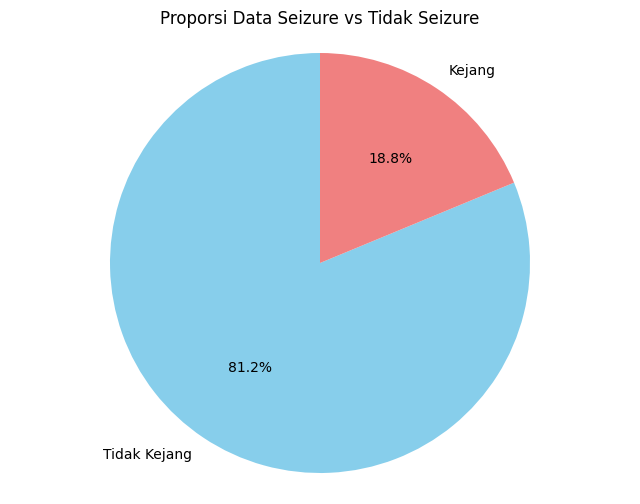

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah masing-masing label (seizure dan tidak seizure)
seizure_counts = TA_1['seizure'].value_counts()

# Menampilkan jumlah data seizure dan tidak seizure
print("Jumlah data seizure dan tidak seizure:")
print(seizure_counts)

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Data Seizure vs Tidak Seizure')
plt.axis('equal')  # Menjaga proporsi lingkaran tetap
plt.show()

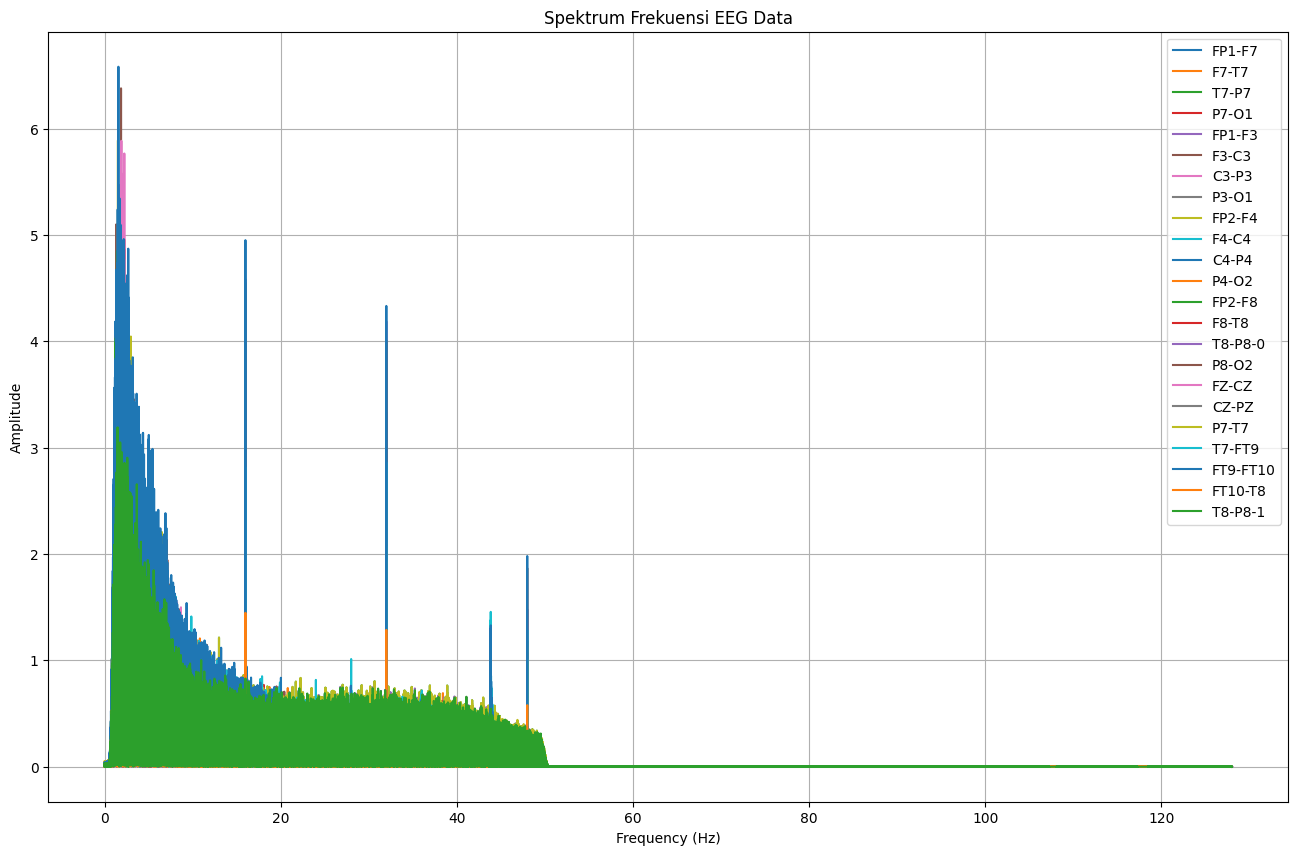

In [ ]:

# Misalkan data memiliki kolom 'Frequency' sebagai sumbu x
frequency = TA_1['frekuensi']

# Daftar channel yang ingin divisualisasikan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

plt.figure(figsize=(16, 10))

for channel in channels:
    if channel in TA_1.columns:
        plt.plot(frequency, TA_1[channel].values, label=channel)

plt.title('Spektrum Frekuensi EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Mounted at /content/drive
/content/drive/MyDrive/TA
Akurasi pada data latih: 0.9627165575961217
Akurasi pada data uji: 0.9614995609120915
Laporan Klasifikasi (Data Uji):
               precision    recall  f1-score   support

      Kejang       0.93      0.86      0.89    154795
Tidak Kejang       0.97      0.98      0.98    670780

    accuracy                           0.96    825575
   macro avg       0.95      0.92      0.94    825575
weighted avg       0.96      0.96      0.96    825575



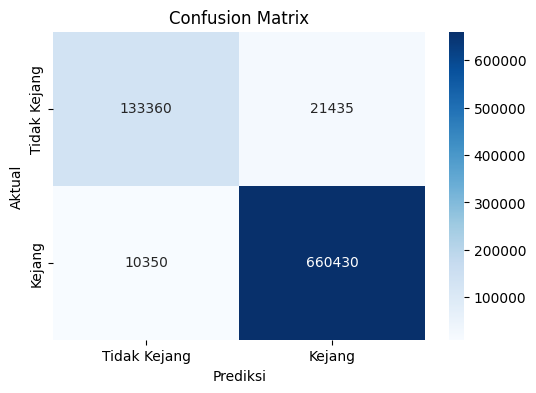

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

# ini random forest
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the CSV file into a pandas DataFrame
TA_RDF = pd.read_csv("/content/drive/MyDrive/TA/FILTERING - FFT - SEMUA FREKUENSI.csv")

# Step 11: Siapkan data untuk klasifikasi
X = TA_RDF.drop(['seizure', 'frekuensi'], axis=1)
y = TA_RDF['seizure']

# Step 12: Bagi data menjadi latih dan uji secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Step 13: Latih model Random Forest dengan max_features='sqrt'
model = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data latih
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prediksi pada data uji
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Step 14: Evaluasi model -> Cetak akurasi dan laporan
print("Akurasi pada data latih:", train_accuracy)  # Akurasi pada data latih
print("Akurasi pada data uji:", test_accuracy)  # Akurasi pada data uji
print("Laporan Klasifikasi (Data Uji):\n", classification_report(y_test, y_pred))

# Step 15: Matriks Evaluasi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Kejang', 'Kejang'], yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


# FILTERING -> GABUNG -> FFT -> CUT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import matplotlib.pyplot as plt
import pandas as pd
# Simpan data setelah FFT ke file CSV
TA_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING - FFT - SEMUA FREKUENSI.csv")

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Data setelah FFT berhasil disimpan dalam file CSV:            FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0        0.014683  0.014983  0.014981  0.014705  0.012789  0.001777  0.004404   
1        0.020178  0.015334  0.008861  0.007056  0.011900  0.004289  0.013259   
2        0.009895  0.008395  0.002115  0.003198  0.016513  0.007895  0.013164   
3        0.013997  0.003078  0.016560  0.008160  0.015449  0.004605  0.018855   
4        0.019740  0.003326  0.013111  0.004015  0.014774  0.016888  0.014012   
...           ...       ...       ...       ...       ...       ...       ...   
4127867  0.000112  0.000247  0.000503  0.000467  0.000603  0.000571  0.000347   
4127868  0.000235  0.000169  0.000377  0.000246  0.000286  0.000408  0.000444   
4127869  0.000143  0.000231  0.000328  0.000338  0.000202  0.0007

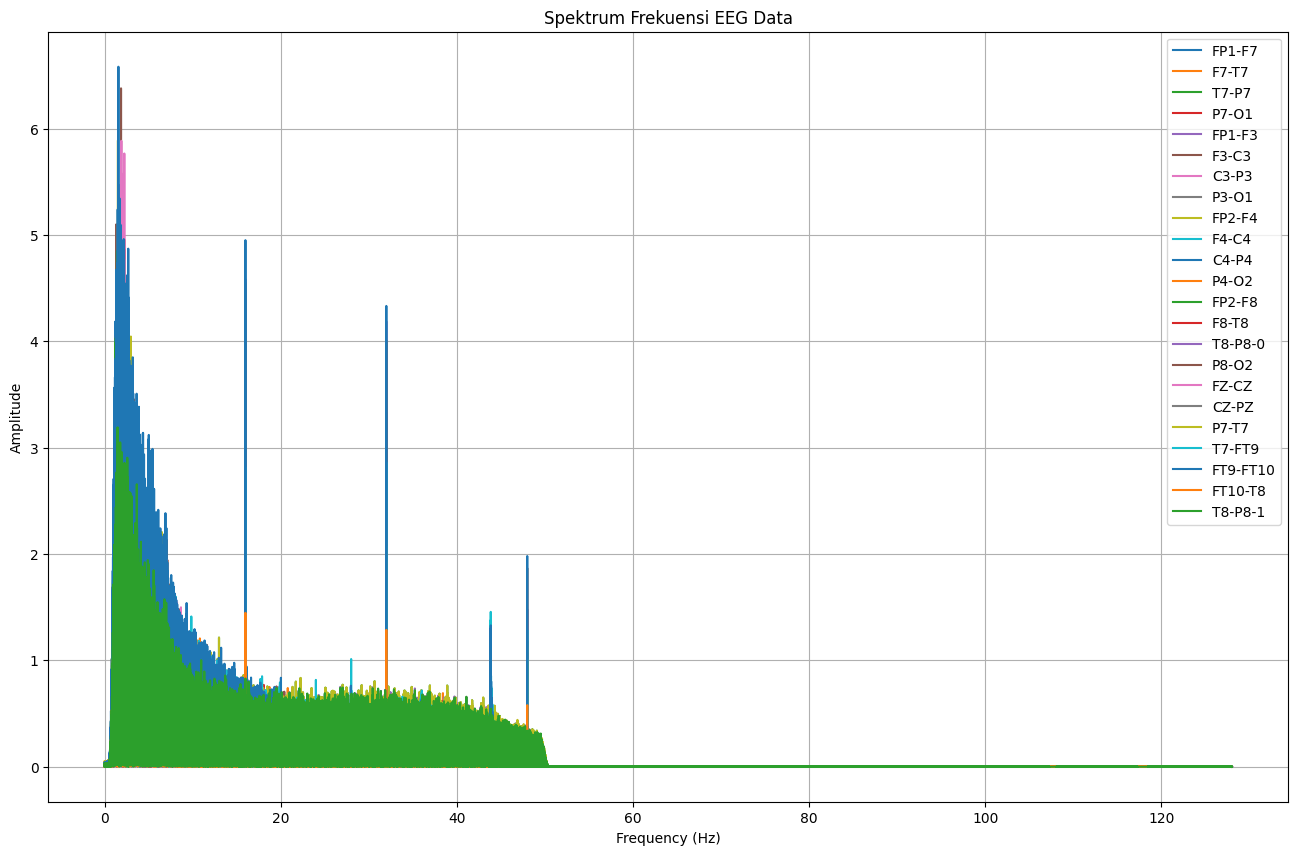

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

TA_1 = pd.read_csv("/content/drive/MyDrive/TA/FILTERING - FFT - SEMUA FREKUENSI.csv")

# Misalkan data memiliki kolom 'Frequency' sebagai sumbu x
frequency = TA_1['frekuensi']

# Daftar channel yang ingin divisualisasikan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

plt.figure(figsize=(16, 10))

for channel in channels:
    if channel in TA_1.columns:
        plt.plot(frequency, TA_1[channel].values, label=channel)

plt.title('Spektrum Frekuensi EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
# Menghapus kolom 'seizure' dan 'Time'
TA_1.drop(columns=['seizure'], inplace=True)

# Menampilkan DataFrame setelah penghapusan
print(TA_1)

           FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0        0.014683  0.014983  0.014981  0.014705  0.012789  0.001777  0.004404   
1        0.020178  0.015334  0.008861  0.007056  0.011900  0.004289  0.013259   
2        0.009895  0.008395  0.002115  0.003198  0.016513  0.007895  0.013164   
3        0.013997  0.003078  0.016560  0.008160  0.015449  0.004605  0.018855   
4        0.019740  0.003326  0.013111  0.004015  0.014774  0.016888  0.014012   
...           ...       ...       ...       ...       ...       ...       ...   
4127867  0.000112  0.000247  0.000503  0.000467  0.000603  0.000571  0.000347   
4127868  0.000235  0.000169  0.000377  0.000246  0.000286  0.000408  0.000444   
4127869  0.000143  0.000231  0.000328  0.000338  0.000202  0.000711  0.000647   
4127870  0.000351  0.000559  0.000423  0.000348  0.000410  0.000313  0.000263   
4127871  0.000311  0.000402  0.000366  0.000508  0.000527  0.000779  0.000320   

            P3-O1    FP2-F4

In [ ]:
# Menghapus data dengan frekuensi 0-1 Hz dan 50-128 Hz
df_fft_cut_labeling = TA_1[(TA_1['frekuensi'] > 1) & (TA_1['frekuensi'] < 50)]

# Menampilkan DataFrame setelah penyesuaian
print(df_fft_cut_labeling)

           FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
32250    0.244961  0.180293  0.662800  0.984443  0.395524  0.295806  0.418166   
32251    0.666990  0.245679  0.363074  0.361229  0.617477  0.423813  0.017553   
32252    1.172416  0.483550  0.159950  1.118593  0.609445  0.442776  0.545935   
32253    0.647874  0.927142  0.341379  1.033421  0.216234  1.002359  0.697746   
32254    0.420157  0.584534  0.197855  0.807375  0.199800  0.661312  0.899952   
...           ...       ...       ...       ...       ...       ...       ...   
1612445  0.058010  0.063866  0.063815  0.007517  0.027049  0.017147  0.003791   
1612446  0.047716  0.051122  0.045339  0.016418  0.017494  0.011789  0.008658   
1612447  0.034928  0.014925  0.041532  0.028757  0.016931  0.020145  0.013192   
1612448  0.023687  0.019749  0.004947  0.033724  0.013075  0.016490  0.010763   
1612449  0.026672  0.016651  0.064834  0.035004  0.039497  0.013892  0.004013   

            P3-O1    FP2-F4

In [ ]:
# Menambahkan kolom labeling berdasarkan frekuensi
df_fft_cut_labeling['seizure'] = df_fft_cut_labeling['frekuensi'].apply(lambda x: 'Kejang' if 1 <= x <= 25 else 'Tidak Kejang')

# Menampilkan DataFrame setelah penambahan label
print(df_fft_cut_labeling)

           FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
32250    0.244961  0.180293  0.662800  0.984443  0.395524  0.295806  0.418166   
32251    0.666990  0.245679  0.363074  0.361229  0.617477  0.423813  0.017553   
32252    1.172416  0.483550  0.159950  1.118593  0.609445  0.442776  0.545935   
32253    0.647874  0.927142  0.341379  1.033421  0.216234  1.002359  0.697746   
32254    0.420157  0.584534  0.197855  0.807375  0.199800  0.661312  0.899952   
...           ...       ...       ...       ...       ...       ...       ...   
1612445  0.058010  0.063866  0.063815  0.007517  0.027049  0.017147  0.003791   
1612446  0.047716  0.051122  0.045339  0.016418  0.017494  0.011789  0.008658   
1612447  0.034928  0.014925  0.041532  0.028757  0.016931  0.020145  0.013192   
1612448  0.023687  0.019749  0.004947  0.033724  0.013075  0.016490  0.010763   
1612449  0.026672  0.016651  0.064834  0.035004  0.039497  0.013892  0.004013   

            P3-O1    FP2-F4

<ipython-input-16-e7ada11e368a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fft_cut_labeling['seizure'] = df_fft_cut_labeling['frekuensi'].apply(lambda x: 'Kejang' if 1 <= x <= 25 else 'Tidak Kejang')


In [ ]:
# Simpan data yang digabung
df_fft_cut_labeling.to_csv("/content/drive/MyDrive/TA/FILTERING -> GABUNG -> FFT -> CUT (labeling).csv")
df_fft_cut_labeling

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,frekuensi,seizure
32250,0.244961,0.180293,0.662800,0.984443,0.395524,0.295806,0.418166,0.332146,0.720670,0.172256,...,0.355606,0.497021,0.526546,0.661929,0.213389,1.034446,0.346411,0.718940,1.000031,Kejang
32251,0.666990,0.245679,0.363074,0.361229,0.617477,0.423813,0.017553,0.884682,0.514964,0.506651,...,0.383708,0.195404,0.528487,0.364052,0.434845,0.505082,0.158451,0.255439,1.000062,Kejang
32252,1.172416,0.483550,0.159950,1.118593,0.609445,0.442776,0.545935,0.743505,0.282391,0.742492,...,0.209365,0.071974,0.190948,0.158396,0.761637,0.177002,0.609638,0.305373,1.000093,Kejang
32253,0.647874,0.927142,0.341379,1.033421,0.216234,1.002359,0.697746,0.526389,0.202593,0.386000,...,0.181189,0.399285,0.147384,0.342137,0.968201,0.636372,0.362367,0.497626,1.000124,Kejang
32254,0.420157,0.584534,0.197855,0.807375,0.199800,0.661312,0.899952,0.236888,0.147464,0.275883,...,0.305868,0.254541,0.639144,0.196637,0.553858,1.386790,0.079748,0.284939,1.000155,Kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612445,0.058010,0.063866,0.063815,0.007517,0.027049,0.017147,0.003791,0.016258,0.046361,0.033077,...,0.051415,0.013995,0.021536,0.064114,0.017216,0.008232,0.008900,0.067577,49.999845,Tidak Kejang
1612446,0.047716,0.051122,0.045339,0.016418,0.017494,0.011789,0.008658,0.017656,0.049932,0.022413,...,0.028574,0.011011,0.019837,0.049241,0.062490,0.042670,0.049363,0.081708,49.999876,Tidak Kejang
1612447,0.034928,0.014925,0.041532,0.028757,0.016931,0.020145,0.013192,0.020218,0.018679,0.030604,...,0.017351,0.004266,0.022708,0.038350,0.050027,0.043040,0.037673,0.047043,49.999907,Tidak Kejang
1612448,0.023687,0.019749,0.004947,0.033724,0.013075,0.016490,0.010763,0.010836,0.011314,0.037211,...,0.005090,0.008100,0.022087,0.006669,0.018722,0.078902,0.067500,0.025412,49.999938,Tidak Kejang


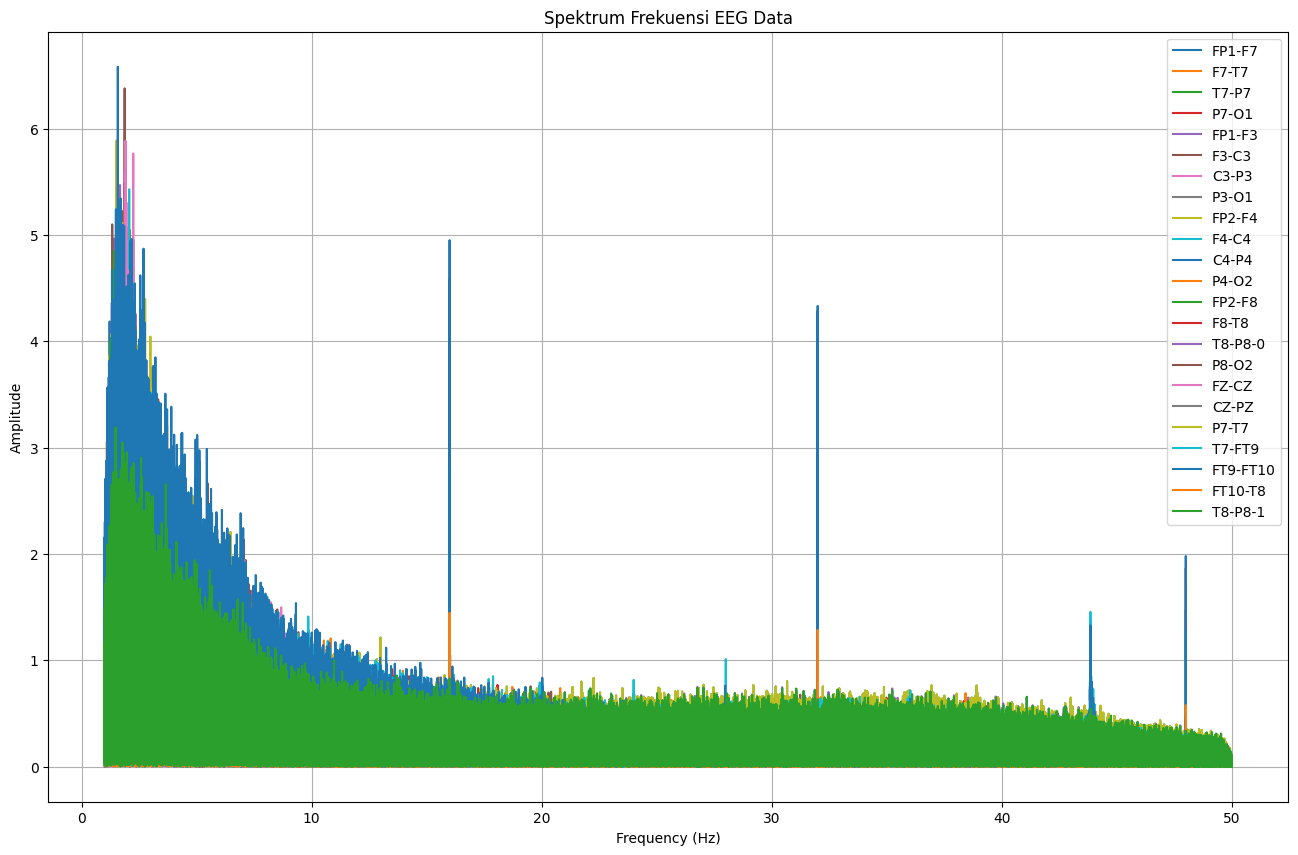

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_fft_cut_labeling = pd.read_csv("/content/drive/MyDrive/TA/FILTERING -> GABUNG -> FFT -> CUT (labeling).csv")

# Misalkan data memiliki kolom 'Frequency' sebagai sumbu x
frequency = df_fft_cut_labeling['frekuensi']

# Daftar channel yang ingin divisualisasikan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

plt.figure(figsize=(16, 10))

for channel in channels:
    if channel in df_fft_cut_labeling.columns:
        plt.plot(frequency, df_fft_cut_labeling[channel].values, label=channel)

plt.title('Spektrum Frekuensi EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Jumlah data seizure dan tidak seizure:
seizure
Tidak Kejang    806225
Kejang          773975
Name: count, dtype: int64


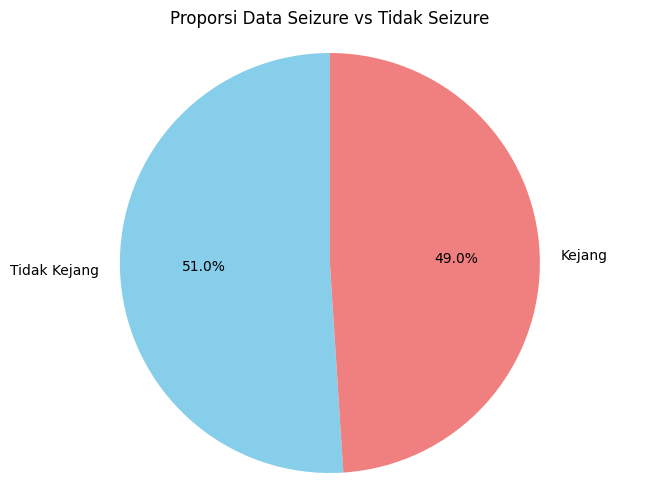

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah masing-masing label (seizure dan tidak seizure)
seizure_counts = df_fft_cut_labeling['seizure'].value_counts()

# Menampilkan jumlah data seizure dan tidak seizure
print("Jumlah data seizure dan tidak seizure:")
print(seizure_counts)

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Data Seizure vs Tidak Seizure')
plt.axis('equal')  # Menjaga proporsi lingkaran tetap
plt.show()

Akurasi pada data latih: 1.0
Akurasi pada data uji: 1.0
Laporan Klasifikasi (Data Uji):
               precision    recall  f1-score   support

      Kejang       1.00      1.00      1.00    154795
Tidak Kejang       1.00      1.00      1.00    161245

    accuracy                           1.00    316040
   macro avg       1.00      1.00      1.00    316040
weighted avg       1.00      1.00      1.00    316040



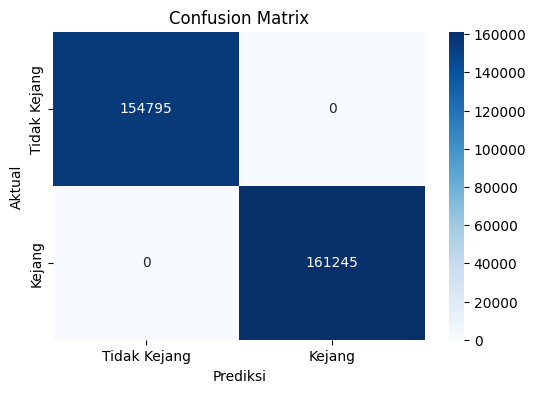

In [ ]:
# ini random forest
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_fft_cut_labeling = pd.read_csv("/content/drive/MyDrive/TA/FILTERING -> GABUNG -> FFT -> CUT (labeling).csv")

# Step 11: Siapkan data untuk klasifikasi
X = df_fft_cut_labeling.drop(['frekuensi', 'seizure'], axis=1)
y = df_fft_cut_labeling['seizure']

# Step 12: Bagi data menjadi latih dan uji secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Step 13: Latih model Random Forest dengan max_features='sqrt'
model = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data latih
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prediksi pada data uji
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Step 14: Evaluasi model -> Cetak akurasi dan laporan
print("Akurasi pada data latih:", train_accuracy)  # Akurasi pada data latih
print("Akurasi pada data uji:", test_accuracy)  # Akurasi pada data uji
print("Laporan Klasifikasi (Data Uji):\n", classification_report(y_test, y_pred))

# Step 15: Matriks Evaluasi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Kejang', 'Kejang'], yticklabels=['Tidak Kejang', 'Kejang'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# LABEL -> GABUNG

In [ ]:
T_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_03.csv")
T_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_04.csv")
T_3 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_15.csv")
T_4 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_16.csv")
T_5 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_18.csv")
T_6 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_21.csv")
T_7 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_26.csv")
T_8 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb02_16.csv")
T_9 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb02_16+.csv")
T_10 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb02_19.csv")
T_11 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_01.csv")
T_12 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_02.csv")
T_13 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_03.csv")
T_14 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_04.csv")
T_15 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_34.csv")
T_16 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_35.csv")
T_17 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb03_36.csv")
T_18 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb04_05.csv")
T_19 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb04_08.csv")
T_20 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb04_28.csv")
T_20_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb04_28_1.csv")
T_21 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_06.csv")
T_22 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_13.csv")
T_23 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_16.csv")
T_24 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_17.csv")
T_25 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb05_22.csv")
T_26 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_01.csv")
T_26_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_01_1.csv")
T_26_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_01_2.csv")
T_27 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_04.csv")
T_27_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_04_1.csv")
T_28 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_09.csv")
T_29 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_10.csv")
T_30 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_13.csv")
T_31 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_18.csv")
T_32 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb06_24.csv")
T_33 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb07_12.csv")
T_34 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb07_13.csv")
T_35 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb07_19.csv")
T_36 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb08_02.csv")
T_37 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb08_05.csv")
T_38 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb08_11.csv")
T_39 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb08_13.csv")
T_40 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb08_21.csv")
T_41 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb09_06.csv")
T_42 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb09_08.csv")
T_42_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb09_08_1.csv")
T_43 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb09_19.csv")
T_44 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb10_12.csv")
T_45 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb10_20.csv")
T_46 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb10_27.csv")
T_47 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb10_30.csv")
T_48 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb10_31.csv")
T_49 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb10_38.csv")
T_50 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb10_89.csv")
T_51 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb11_82.csv")
T_52 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb11_92.csv")
T_53 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb11_99.csv")
T_54 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_06.csv")
T_54_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_06_1.csv")
T_55 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_08.csv")
T_55_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_08_1.csv")
T_55_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_08_2.csv")
T_55_3 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_08_3.csv")
T_56 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_09.csv")
T_56_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_09_1.csv")
T_57 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_10.csv")
T_57_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_10_1.csv")
T_58 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_11.csv")
T_59 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_23.csv")
T_59_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_23_1.csv")
T_59_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_23_2.csv")
#T_61 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_28.csv")
#T_62 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_29.csv")
T_63 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_33.csv")
T_63_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_33_1.csv")
T_64 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_36.csv")
T_65 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_38.csv")
T_65_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_38_1.csv")
T_65_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_38_2.csv")
T_65_3 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_38_3.csv")
T_65_4 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_38_4.csv")
T_66 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_42.csv")
T_66_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_42_1.csv")
T_66_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_42_2.csv")
T_66_3 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_42_3.csv")
T_66_4 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb12_42_4.csv")
T_67 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb13_19.csv")
T_68 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb13_21.csv")
#T_69 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb13_40.csv")
#T_69_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb13_40_1.csv")
T_70 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb13_55.csv")
T_70_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb13_55_1.csv")
T_71 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb13_58.csv")
T_72 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb13_59.csv")
T_73 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb13_60.csv")
T_74 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb13_62.csv")
T_74_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb13_62_1.csv")
T_74_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb13_62_2.csv")
T_75 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb14_03.csv")
T_76 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb14_04.csv")
T_76_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb14_04_1.csv")
T_77 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb14_06.csv")
T_78 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb14_11.csv")
T_79 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb14_17.csv")
T_80 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb14_18.csv")
T_81 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb14_27.csv")
T_82 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_06.csv")
T_83 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_10.csv")
T_84 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_15.csv")
T_85 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_17.csv")
T_86 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_20.csv")
T_87 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_22.csv")
T_88 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_28.csv")
T_89 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_31.csv")
T_90 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_40.csv")
T_90_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_40_1.csv")
T_90_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_40_2.csv")
T_91 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_46.csv")
T_92 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_49.csv")
T_93 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_52.csv")
T_94 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_54.csv")
T_94_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_54_1.csv")
T_94_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_54_2.csv")
T_94_3 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_54_3.csv")
T_94_4 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_54_4.csv")
T_95 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb15_62.csv")
T_96 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb16_10.csv")
T_97 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb16_11.csv")
T_98 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb16_14.csv")
T_99 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb16_16.csv")
T_100 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb16_17.csv")
T_100_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb16_17_1.csv")
T_100_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb16_17_2.csv")
T_100_3 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb16_17_3.csv")
#T_101 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb16_18.csv")
#T_101_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb16_18_1.csv")
T_102 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb17_03.csv")
T_103 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb17_04.csv")
T_104 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb17_63.csv")
T_105 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb18_29.csv")
T_106 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb18_30.csv")
T_107 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb18_31.csv")
T_108 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb18_32.csv")
T_109 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb18_35.csv")
T_110 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb18_36.csv")
T_111 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb19_28.csv")
T_112 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb19_29.csv")
T_113 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb19_30.csv")
T_114 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb20_12.csv")
T_115 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb20_13.csv")
T_115_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb20_13_1.csv")
T_116 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb20_14.csv")
T_117 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb20_15.csv")
T_117_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb20_15_1.csv")
T_118 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb20_16.csv")
T_119 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb20_68.csv")
T_120 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb21_19.csv")
T_121 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb21_20.csv")
T_122 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb21_21.csv")
T_123 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb21_22.csv")
T_124 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb22_20.csv")
T_125 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb22_25.csv")
T_126 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb22_38.csv")
T_127 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb23_06.csv")
T_128 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb23_08.csv")
T_128_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb23_08_1.csv")
T_129 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb23_09.csv")
T_129_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb23_09_1.csv")
T_129_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb23_09_2.csv")
T_129_3 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb23_09_3.csv")
T_130 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_01.csv")
T_131 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_03.csv")
T_132 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_04.csv")
T_132_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_04_1.csv")
T_132_2 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_04_2.csv")
T_133 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_06.csv")
T_134 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_07.csv")
T_135 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_09.csv")
T_136 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_11.csv")
T_137 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_13.csv")
T_138 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_14.csv")
T_139 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_15.csv")
T_140 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_17.csv")
T_141 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb24_21.csv")



# Menggabungkan semua dataframe dari TA_1 hingga TA_20 menjadi TA_data
T_data = pd.concat([T_1, T_2, T_3, T_4, T_5, T_6, T_7, T_8, T_9, T_10,
                    T_11, T_12, T_13, T_14, T_15, T_16, T_17, T_18,
                    T_19, T_20, T_20_1, T_21, T_22, T_23, T_24,
                    T_25, T_26, T_26_1, T_26_2, T_27, T_27_1,
                    T_28, T_29, T_30, T_31, T_32, T_33, T_34,
                    T_35, T_36, T_37, T_38, T_39, T_40,
                    T_41, T_42, T_42_1, T_43, T_44, T_45,
                    T_46, T_47, T_48, T_49, T_50, T_51,
                    T_52, T_53, T_54, T_54_1, T_55, T_55_1,
                    T_55_2, T_55_3, T_56, T_56_1, T_57, T_57_1,
                    T_58, T_59, T_59_1, T_59_2, T_63, T_63_1,
                    T_64, T_65, T_65_1, T_65_2, T_65_3, T_65_4,
                    T_66, T_66_1, T_66_2, T_66_3, T_66_4, T_67,
                    T_68, T_70, T_70_1, T_71, T_72, T_73,
                    T_74, T_74_1, T_74_2, T_75, T_76, T_76_1,
                    T_77, T_78, T_79, T_80, T_81, T_82,
                    T_83, T_84, T_85, T_86, T_87, T_88,
                    T_89, T_90, T_90_1, T_90_2, T_91, T_92,
                    T_93, T_94, T_94_1, T_94_2, T_94_3, T_94_4,
                    T_95, T_96, T_97, T_98, T_99, T_100,
                    T_100_1, T_100_2, T_100_3, T_102, T_103,
                    T_104, T_105, T_106, T_107, T_108, T_109,
                    T_110, T_111, T_112, T_113, T_114, T_115,
                    T_115_1, T_116, T_117, T_117_1, T_118, T_119,
                    T_120, T_121, T_122, T_123, T_124, T_125,
                    T_126, T_127, T_128, T_128_1, T_129, T_129_1,
                    T_129_2, T_129_3, T_130, T_131, T_132,
                    T_132_1, T_132_2, T_133, T_134, T_135,
                    T_136, T_137, T_138, T_139, T_140, T_141], ignore_index=True)



# Menampilkan 5 baris pertama dari TA_data
print(T_data)

# Simpan data yang digabung
T_data.to_csv("/content/drive/MyDrive/TA/LABEL (semua data yang akan diproses 1-50 hz).csv", index=False)


               FP1-F7     F7-T7         T7-P7     P7-O1    FP1-F3     F3-C3  \
0       -1.953602e-07 -0.000003  8.009768e-06  0.000024  0.000029 -0.000021   
1       -8.791209e-06 -0.000010  4.493284e-06  0.000022  0.000018 -0.000033   
2       -1.269841e-05 -0.000016  1.953602e-07  0.000016  0.000006 -0.000038   
3       -1.543346e-05 -0.000025 -6.446886e-06  0.000017 -0.000009 -0.000037   
4       -2.285714e-05 -0.000028 -9.572650e-06  0.000020 -0.000032 -0.000030   
...               ...       ...           ...       ...       ...       ...   
8255739  8.420024e-05 -0.000119  4.493284e-06 -0.000070  0.000072  0.000044   
8255740  6.778999e-05 -0.000080 -2.598291e-05 -0.000087  0.000029 -0.000211   
8255741  7.755800e-05 -0.000063 -6.974359e-05 -0.000053  0.000027 -0.000192   
8255742  1.127228e-04 -0.000109 -6.153846e-05 -0.000029  0.000049 -0.000004   
8255743  1.107692e-04 -0.000131 -4.747253e-05 -0.000003  0.000013 -0.000026   

            C3-P3         P3-O1    FP2-F4     F4-C4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL (semua data yang akan diproses 1-50 hz).csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 30
sampling_rate = 256
num_taps = 846

# Misalnya, df_1 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_1.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA1['Time'] = df_1['Time'].values
TA1['seizure'] = df_1['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/LABEL -> FILTERING.csv", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {TA1}")



In [ ]:
TA1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL -> FILTERING.csv")


# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA1.columns:
        signal = TA1[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_1 = pd.DataFrame(fft_features).T
TA_1.columns = channels
TA_1['seizure'] = TA1['seizure']
TA_1['frekuensi'] = fft_freqs  # Masukkan frekuensi sebagai kolom pertama


# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_1.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA1[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah FFT ke file CSV
TA_1.to_csv("/content/drive/MyDrive/TA/LABEL - FILTERING - FFT.csv", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")
